# ლექცია #9

## კოდების გაშვებისთვის საჭირო ბიბლიოთეკების იმპორტები

ამ ნოუთბუქის გაშვებამდე არ დაგავიწყდეთ საჭირო დამოკიდებულებების (dependencies) დაინსტალირება, რომლებიც მოცემულია `requirements.txt` ფაილში. მარტივად, ტერმინალიდან გაუშვით:

```bash
pip install -r requirements.txt
```

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

## ხეებზე დაფუძნებული (Tree-Based) ML ალგორითმები

<div style="width:50%; margin: auto;">
<img src="https://cdn.sanity.io/images/oaglaatp/production/7f91e6dc9d5e575b08d7c9ee37deb2264b490db5-5001x3334.jpg?rect=0,1,5001,3333&w=2048&h=1365&auto=format" alt="Groot"/>
</div>

ხეებზე დაფუძნებული ML ალგორითმები არის ისეთი ალგორითმები, რომლებიც იყენებენ გადაწყვეტილების ხის მოდელებს პროგნოზირებისთვის. ისინი აშენებენ ხის მსგავს სტრუქტურას, რათა მიიღონ გადაწყვეტილებები შემავალი მახასიათებლების საფუძველზე.

განვიხილავთ 2 ალგორითმს:

* Decision Tree
* Random Forest

### მონაცემების ჩატვირთვა

#### კლასიფიკაცია

კლასიფიკაციისთვის გამოვიყენებთ `scikit-learn`-ში არსებული ირისის "სათამაშო" მონაცემები, რომელიც შედგება 150 ჩანაწერისგან. მონაცემები შეიცავს 4 მახასიათებელს: სეპალის სიგრძე და სიგანე, ფურცლის სიგრძე და სიგანე. ეტიკეტს წარმოადგენს ირისის სახეობა შემდეგი 3 სახეობიდან: Setosa, Versicolor, Virginica.

![Iris](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [2]:
iris_data = load_iris()

ჩანაწერების 20% ავიღოთ ვალიდაციისთვის:

In [3]:
X_train_iris, X_valid_iris, y_train_iris, y_valid_iris = train_test_split(
    iris_data.data,
    iris_data.target,
    test_size=0.2,
    random_state=1,
    stratify=iris_data.target,
)

In [4]:
print("სატრენინგო მონაცემების ზომა:", X_train_iris.shape, y_train_iris.shape)
print("ვალიდაციის მონაცემების ზომა:", X_valid_iris.shape, y_valid_iris.shape)

სატრენინგო მონაცემების ზომა: (120, 4) (120,)
ვალიდაციის მონაცემების ზომა: (30, 4) (30,)


#### რეგრესია

რეგრესიისთვის გამოვიყენოთ პატარა მონაცემთა ნაკრები (_წრფივი რეგრესიის განხილვისას გამოვიყენეთ, ლექცია #4-ში_), სადაც მოცემულია კონკრეტული ნივთის რეკლამის დანახარჯები ტელევიზორში, რადიოსა და გაზეთში (ათასობით დოლარში) და ამ ნივთის გაყიდვების (ათასობით ერთეულში) მონაცემები.

In [5]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv",
    index_col="ID",
)
df.head()

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
X_train_ad, X_valid_ad, y_train_ad, y_valid_ad = train_test_split(
    df.drop(columns=["Sales"]),
    df["Sales"],
    test_size=0.2,
    random_state=1,
)

In [7]:
print("სატრენინგო მონაცემების ზომა:", X_train_ad.shape, y_train_ad.shape)
print("ვალიდაციის მონაცემების ზომა:", X_valid_ad.shape, y_valid_ad.shape)

სატრენინგო მონაცემების ზომა: (160, 3) (160,)
ვალიდაციის მონაცემების ზომა: (40, 3) (40,)


### Decision Tree 🌳

დიდი ალბათობით გადაწყვეტილების ხე ბევრჯერ გინახავთ. მაგალითად, სურათზე მოცემულია გადაწყვეტილების ხე:

![Decision Tree](https://www.mastersindatascience.org/wp-content/uploads/sites/54/2022/05/tree-graphic.jpg)

ზოგადად, გადაწყვეტილების ხეს გააჩნია კვანძები (nodes) და განშტოებები (branches). ფოთოლი კვანძები (leaf nodes) არის კვანძები, რომლებსაც არ აქვთ დამატებითი კვანძები მათ შემდგომ, ანუ ისინი აღარ ყოფენ მონაცემებს მეტად.

ალგორითმი ირჩევს ერთ მახასიათებელს და მასზე დაყრდნობით ყოფს მონაცემებს ისე, რომ რაც შეიძლება მეტი ინფორმაცია მიიღოს ანუ ["information gain"](https://machinelearningmastery.com/information-gain-and-mutual-information/) იყოს მაქსიმალური. შემდგომ გაყოფილებს შორის ისევ ირჩევს ერთ მახასიათებელს და კვლავ მასზე დაყრდნობით ყოფს მონაცემებს და ასე აგრძელებს სწავლას. ხე რაც უფრო იზრდება, ალგორითმი უფრო კომპლექსური ხდება და უკვე იწყებს "ხმაურის" სწავლასაც და "ზედმეტად მორგება" (overfitting) ხდება. ამისგან თავის ასარიდებლად შეგვიძლია "tree pruning" ("ხის გასხვლის") მეთოდი გამოვიყენოთ: შევზღუდოთ სიღრმე ან/და leaf node-ების რაოდენობა. Decision Tree საკმაოდ მარტივი გასაგებია და ასახსნელადაც მარტივია სხვისთვის.

#### კლასიფიკაცია

ნაგულისხმევად `scikit-learn`-ის `DecisionTreeClassifier` კრიტერიის ფუნქციად იყენებს ჯინი ინდექს (Gini index), რომელსაც ხშირად Gini impurity-ად მოვიხსენიებთ. Gini impurity-ის მნიშვნელობა მოთავსებულია 0-სა და 1-ს შორის, 0 აღნიშნავს pure მონაცემებს, 1 - მთლიანად impure მონაცემებს. pure მონაცემებში ყველა მონაცემი მიეკუთვნება ერთ კლასს/კატეგორიას, ხოლო impure მონაცემებში ისინი განაწილებულნი არიან სხვადასხვა კლასებში/კატეგორიებში. ანუ მახასიათებელი, რომელსაც Gini ინდექსი ექნება მინიმალური, უკეთესია, რადგანაც მასზე დაყრდნობით უფრო შესაძლებელია მონაცემების გაყოფა. მათემატიკურად Gini-ის გამოთვლა ჩაიწერება შემდეგნაირად:

$$\text{Gini impurity} = 1 - \sum^{n}_{i=1} p(i)^2$$

სადაც $p(i)$ არის კონკრეტული კლასისთვის ალბათობა და შესაბამისად, ჯამდება მონაცემებში მოცემული ყველა კლასის ალბათობები.

In [8]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train_iris, y_train_iris)

DecisionTreeClassifier(random_state=1)

დატრენინგებული მოდელიდან შეგვიძლია დაგენერირებული ხე ვიზუალურად გამოვსახოთ:

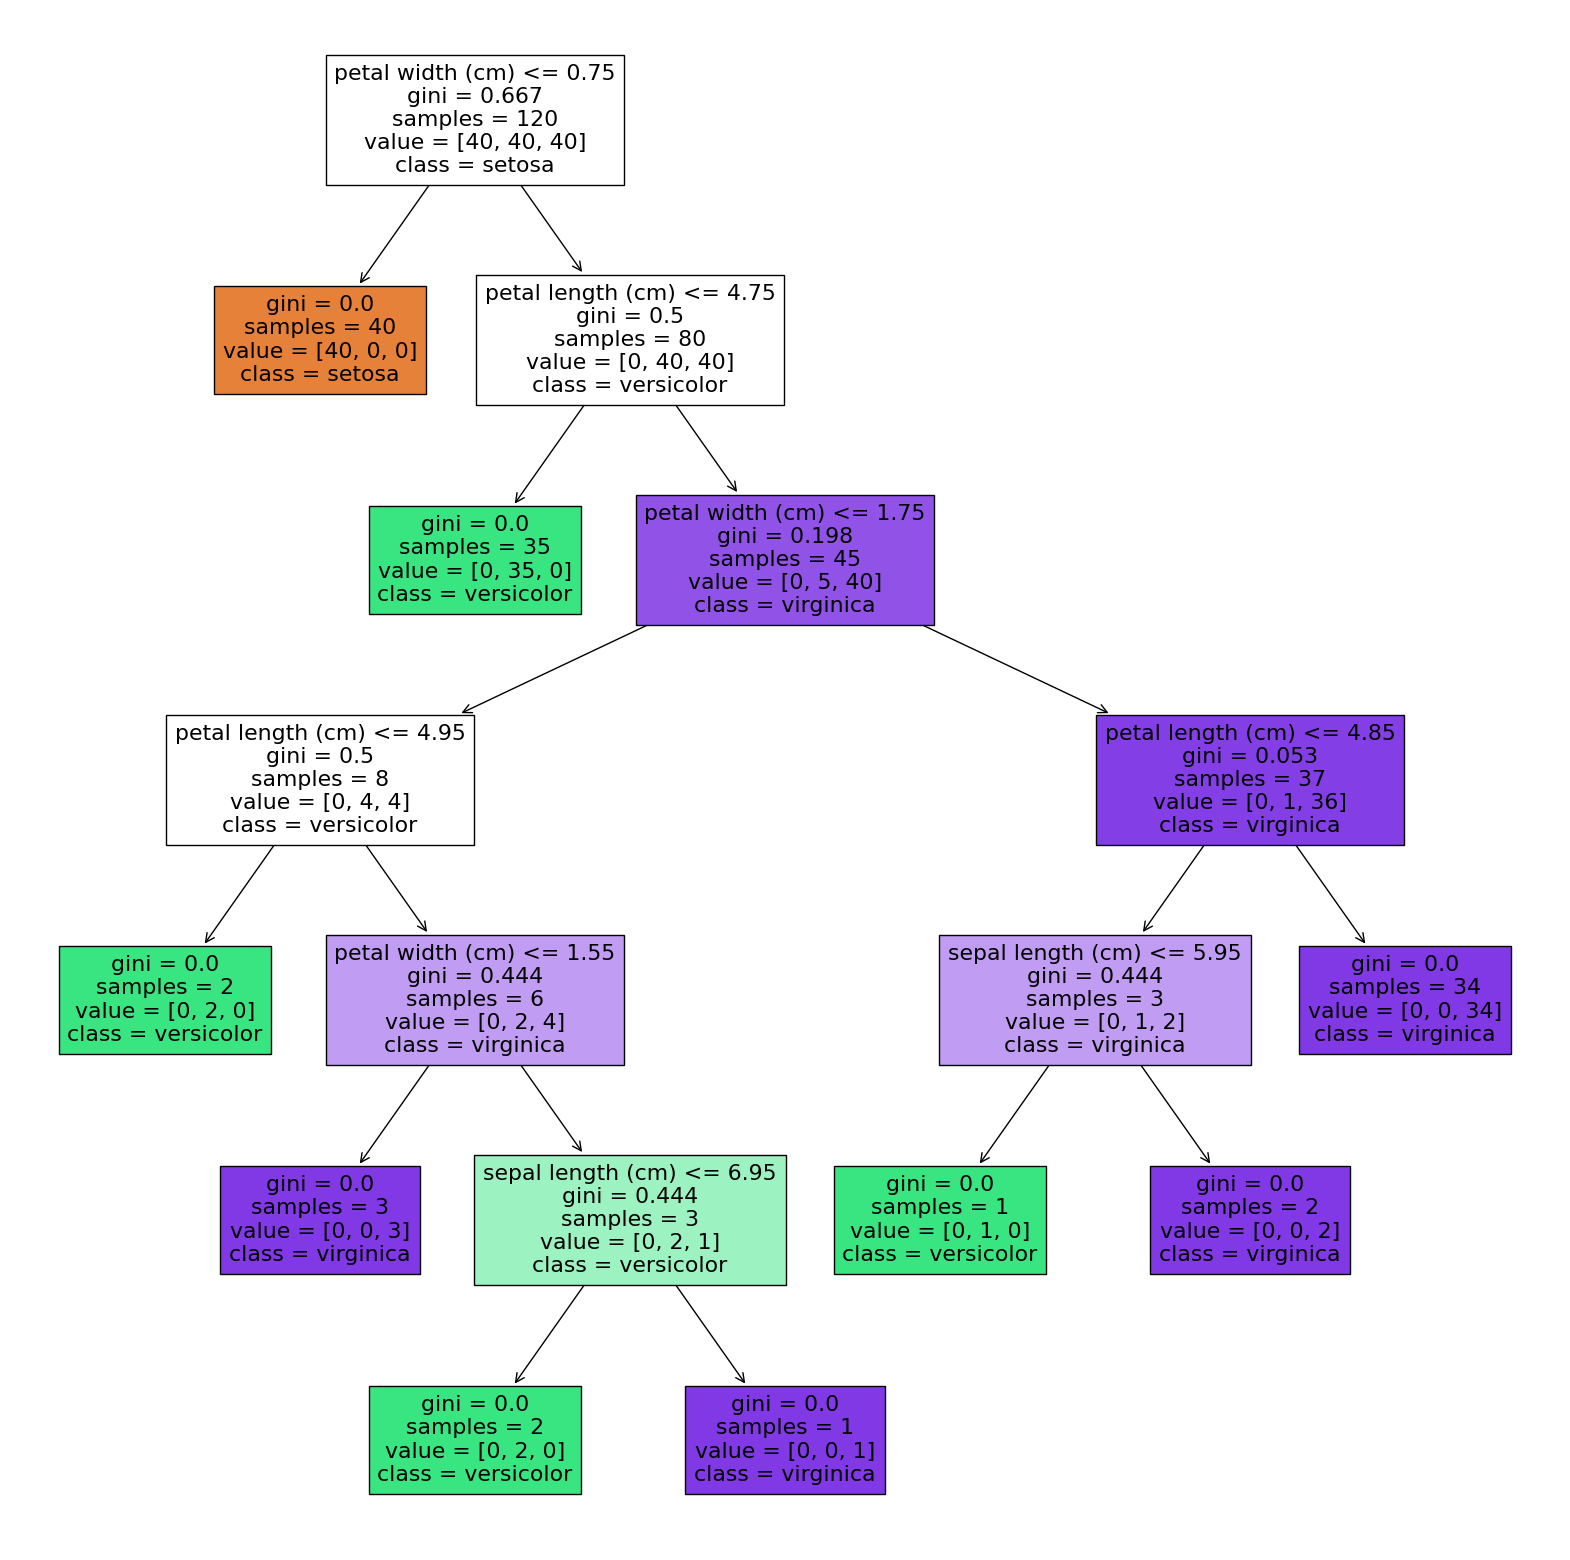

In [9]:
plt.figure(figsize=(20, 20))
plot_tree(
    dt_clf,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names,
    filled=True,
)
plt.show()

ასევე შესაძლებელია ვნახოთ თითოეული მახასიათებელი რამდენად მნიშვნელოვანი იყო, ანუ მათი importance-ები:

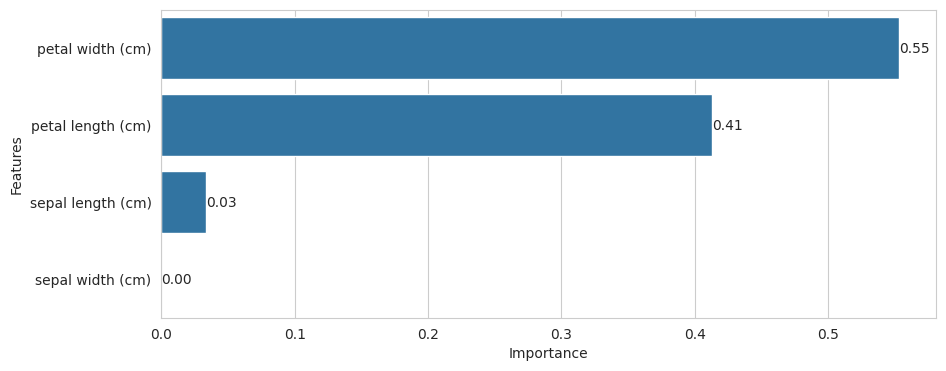

In [10]:
dt_clf_feat_importances = pd.Series(
    dt_clf.feature_importances_, index=iris_data.feature_names
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=dt_clf_feat_importances,
        y=dt_clf_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [11]:
train_preds_dt_clf = dt_clf.predict(X_train_iris)
valid_preds_dt_clf = dt_clf.predict(X_valid_iris)

print(
    "აკურატულობა სატრენინგო მონაცემებზე: "
    f"{accuracy_score(y_train_iris, train_preds_dt_clf) * 100:.2f}%"
)
print(
    "აკურატულობა ვალიდაციის მონაცემებზე: "
    f"{accuracy_score(y_valid_iris, valid_preds_dt_clf) * 100:.2f}%"
)

აკურატულობა სატრენინგო მონაცემებზე: 100.00%
აკურატულობა ვალიდაციის მონაცემებზე: 96.67%


ამჟამად დაგენერირებულ ხეს გააჩნია 6 დონიანი სიღრმე და 9 ფოთოლი (leaf node):

In [12]:
print(f"ხის სიღრმე: {dt_clf.get_depth()}")
print(f"ფოთლების, leaf node-ების რაოდენობა: {dt_clf.get_n_leaves()}")

ხის სიღრმე: 6
ფოთლების, leaf node-ების რაოდენობა: 9


როგორც შედეგებიდან ჩანს, მოდელი "ზედმეტად მოერგო" მონაცემებს, ამიტომაც შეგვიძლია ხელოვნურად შევუზღუდოთ ხის სიღრმე:

In [13]:
dt_clf_pruned = DecisionTreeClassifier(random_state=1, max_depth=4)
dt_clf_pruned.fit(X_train_iris, y_train_iris)

DecisionTreeClassifier(max_depth=4, random_state=1)

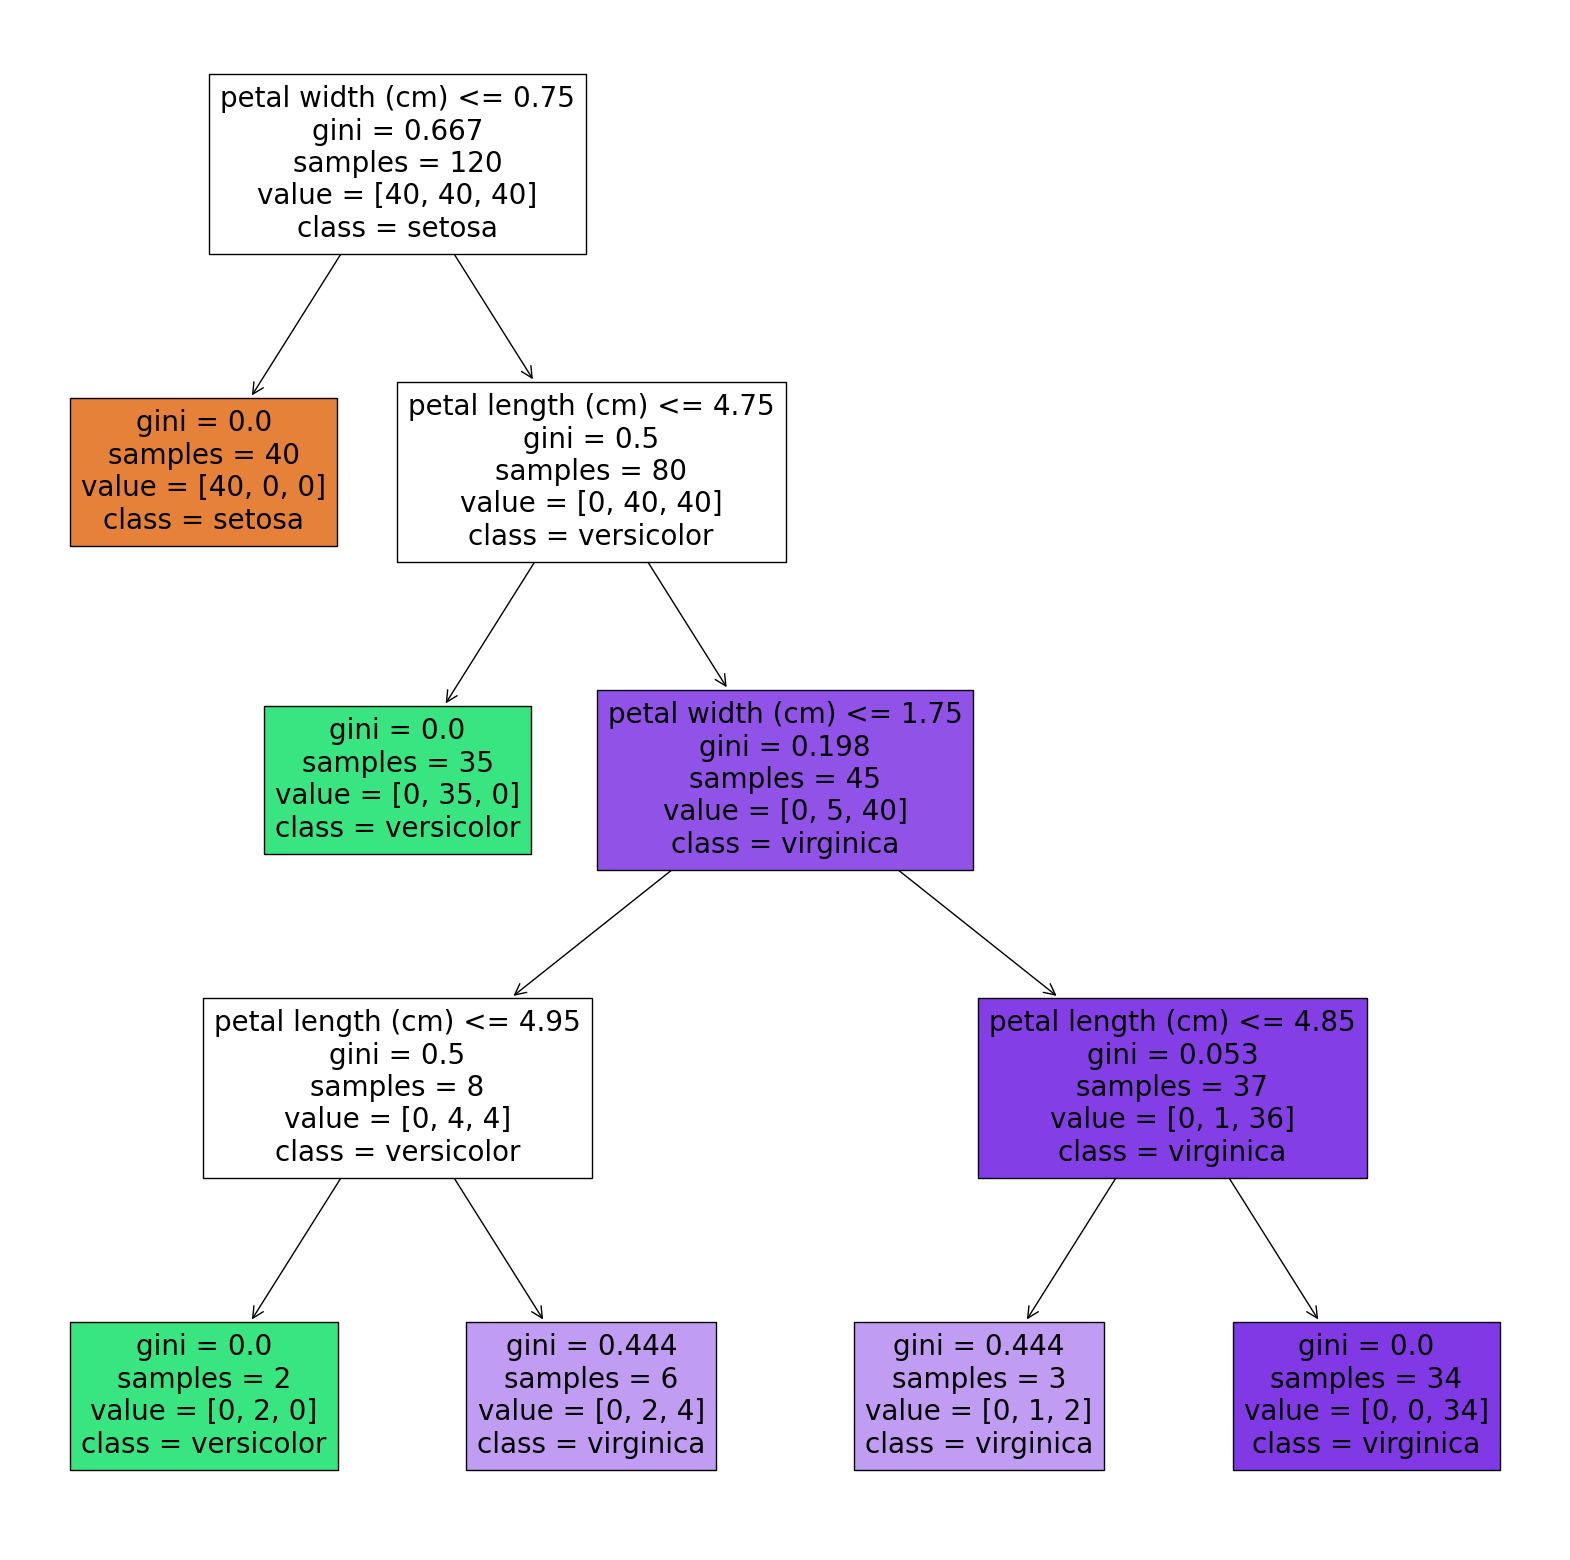

In [14]:
plt.figure(figsize=(20, 20))
plot_tree(
    dt_clf_pruned,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names,
    filled=True,
)
plt.show()

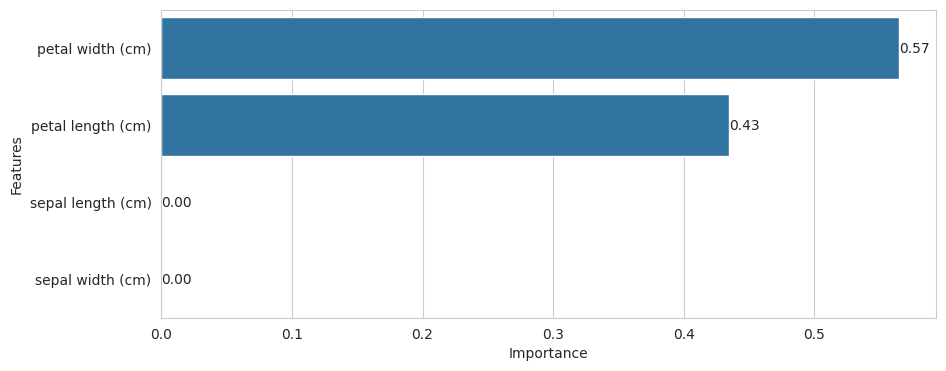

In [15]:
dt_clf_pruned_feat_importances = pd.Series(
    dt_clf_pruned.feature_importances_, index=iris_data.feature_names
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=dt_clf_pruned_feat_importances,
        y=dt_clf_pruned_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [16]:
train_preds_dt_clf_pruned = dt_clf_pruned.predict(X_train_iris)
valid_preds_dt_clf_pruned = dt_clf_pruned.predict(X_valid_iris)

print(
    "აკურატულობა სატრენინგო მონაცემებზე: "
    f"{accuracy_score(y_train_iris, train_preds_dt_clf_pruned) * 100:.2f}%"
)
print(
    "აკურატულობა ვალიდაციის მონაცემებზე: "
    f"{accuracy_score(y_valid_iris, valid_preds_dt_clf_pruned) * 100:.2f}%"
)

აკურატულობა სატრენინგო მონაცემებზე: 97.50%
აკურატულობა ვალიდაციის მონაცემებზე: 96.67%


In [17]:
print(f"ხის სიღრმე: {dt_clf_pruned.get_depth()}")
print(f"ფოთლების, leaf node-ების რაოდენობა: {dt_clf_pruned.get_n_leaves()}")

ხის სიღრმე: 4
ფოთლების, leaf node-ების რაოდენობა: 6


#### რეგრესია

ნაგულისხმევად `scikit-learn`-ის `DecisionTreeRegressor` კრიტერიუმის ფუნქციად იყენებს საშუალო კვადრატული დანაკარგის (mean squared error - MSE) ფუნქციას, რომელიც რეგრესიის შესწავლის , ლექცია #4-ის, დროს განვიხილეთ.

In [18]:
dt_reg = DecisionTreeRegressor(random_state=1)
dt_reg.fit(X_train_ad, y_train_ad)

DecisionTreeRegressor(random_state=1)

რეგრესიისთვისაც შესაძლებელია დაგენერირებული ხის ვიზუალურად გამოსახვა:

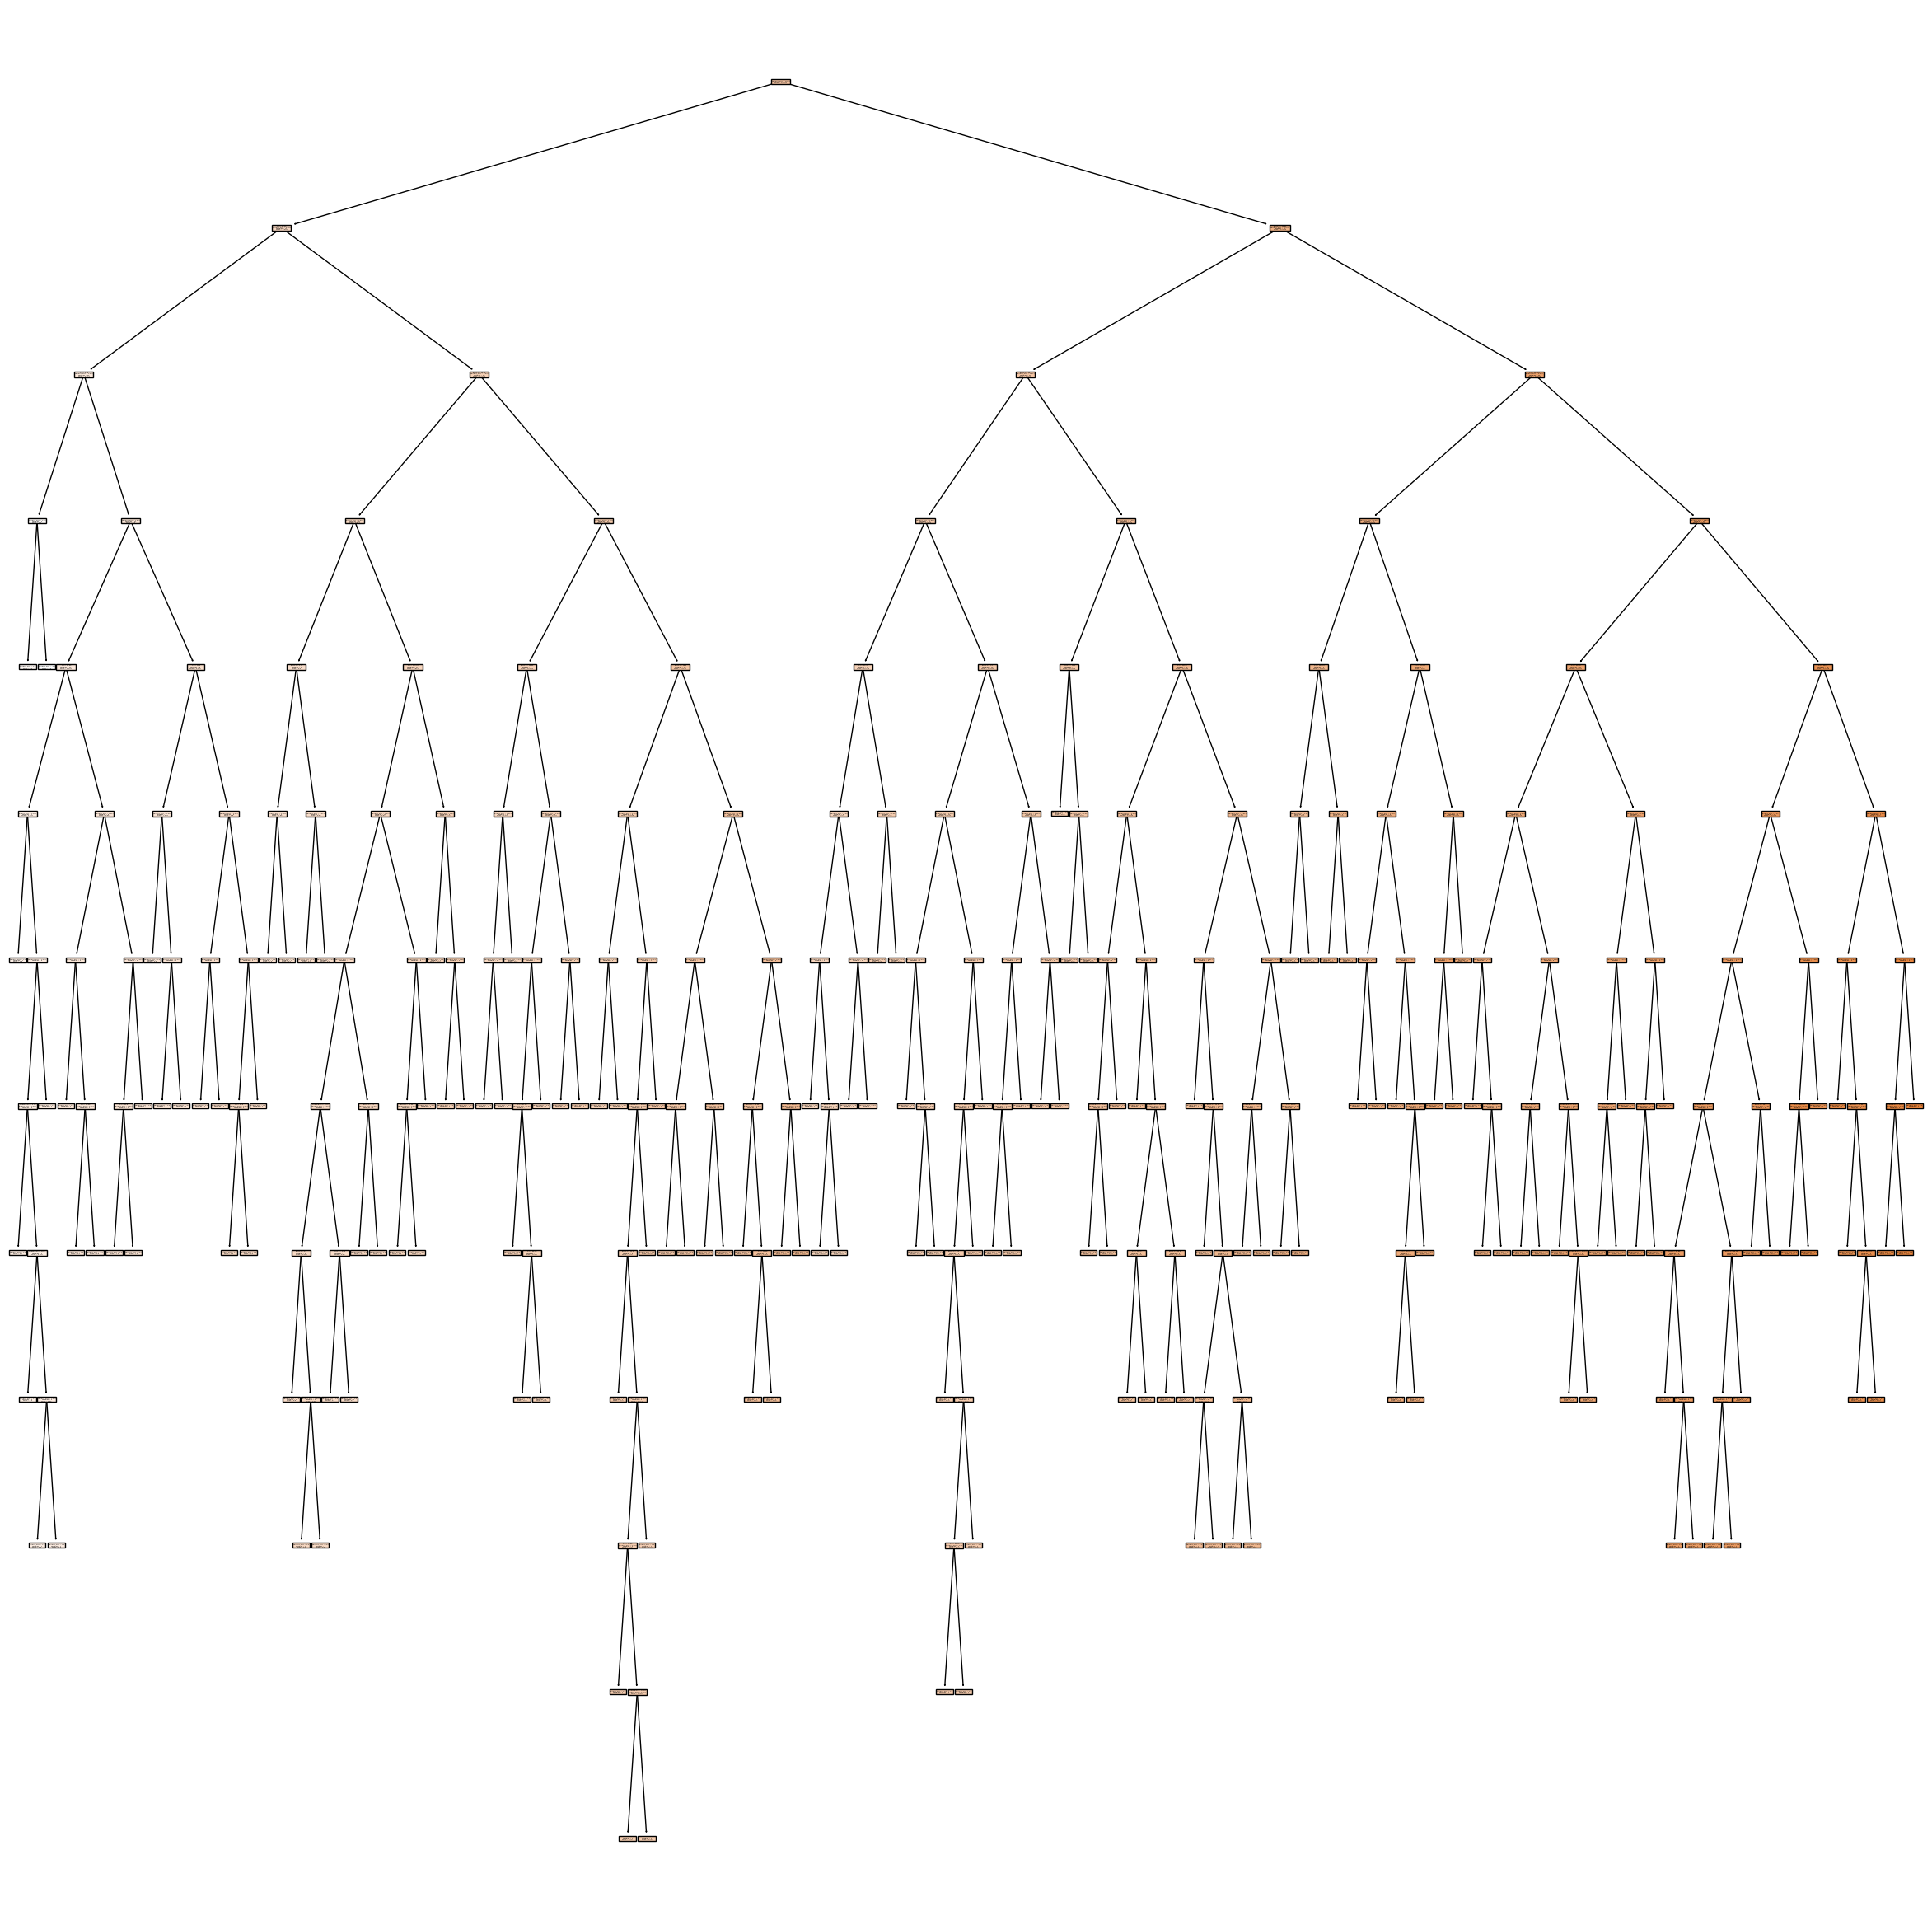

In [19]:
plt.figure(figsize=(30, 30))
plot_tree(dt_reg, feature_names=["TV", "Radio", "Newspaper"], filled=True)
# დიდი ალბათობით უზარმაზარ ხეს მივიღებთ, ამიტომ სასურველია ფოტოდ შევინახოთ, რომ მარტივად შევძლოთ დაზუმება
plt.savefig("dt_reg_tree.svg", format="svg", dpi=500)
plt.show()

ასევე მახასიათებლების importance-ები:

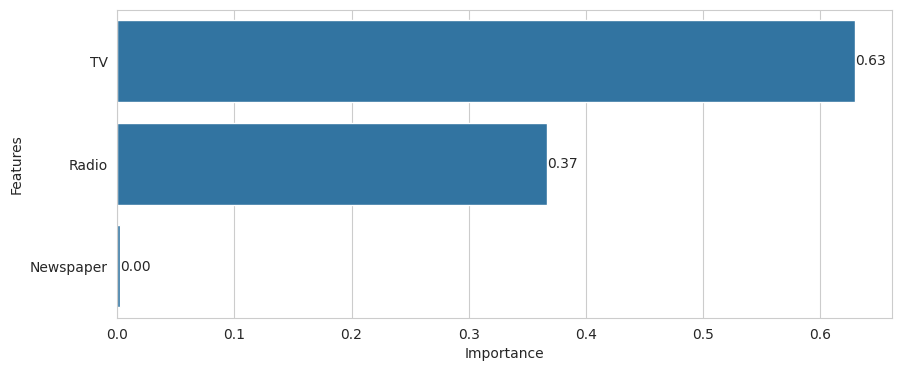

In [20]:
dt_reg_feat_importances = pd.Series(
    dt_reg.feature_importances_, index=["TV", "Radio", "Newspaper"]
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=dt_reg_feat_importances,
        y=dt_reg_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [21]:
train_preds_dt_reg = dt_reg.predict(X_train_ad)
valid_preds_dt_reg = dt_reg.predict(X_valid_ad)

print(
    "MSE სატრენინგო მონაცემებზე: "
    f"{mean_squared_error(y_train_ad, train_preds_dt_reg):.2f}"
)
print(
    "MSE ვალიდაციის მონაცემებზე: "
    f"{mean_squared_error(y_valid_ad, valid_preds_dt_reg):.2f}"
)

MSE სატრენინგო მონაცემებზე: 0.00
MSE ვალიდაციის მონაცემებზე: 0.56


In [22]:
print(f"ხის სიღრმე: {dt_reg.get_depth()}")
print(f"ფოთლების, leaf node-ების რაოდენობა: {dt_reg.get_n_leaves()}")

ხის სიღრმე: 12
ფოთლების, leaf node-ების რაოდენობა: 153


რეგრესიის შემთხვევაშიც შეგვიძლია ხის სიღმის შეზღუდვა:

In [23]:
dt_reg_pruned = DecisionTreeRegressor(random_state=1, max_depth=5)
dt_reg_pruned.fit(X_train_ad, y_train_ad)

DecisionTreeRegressor(max_depth=5, random_state=1)

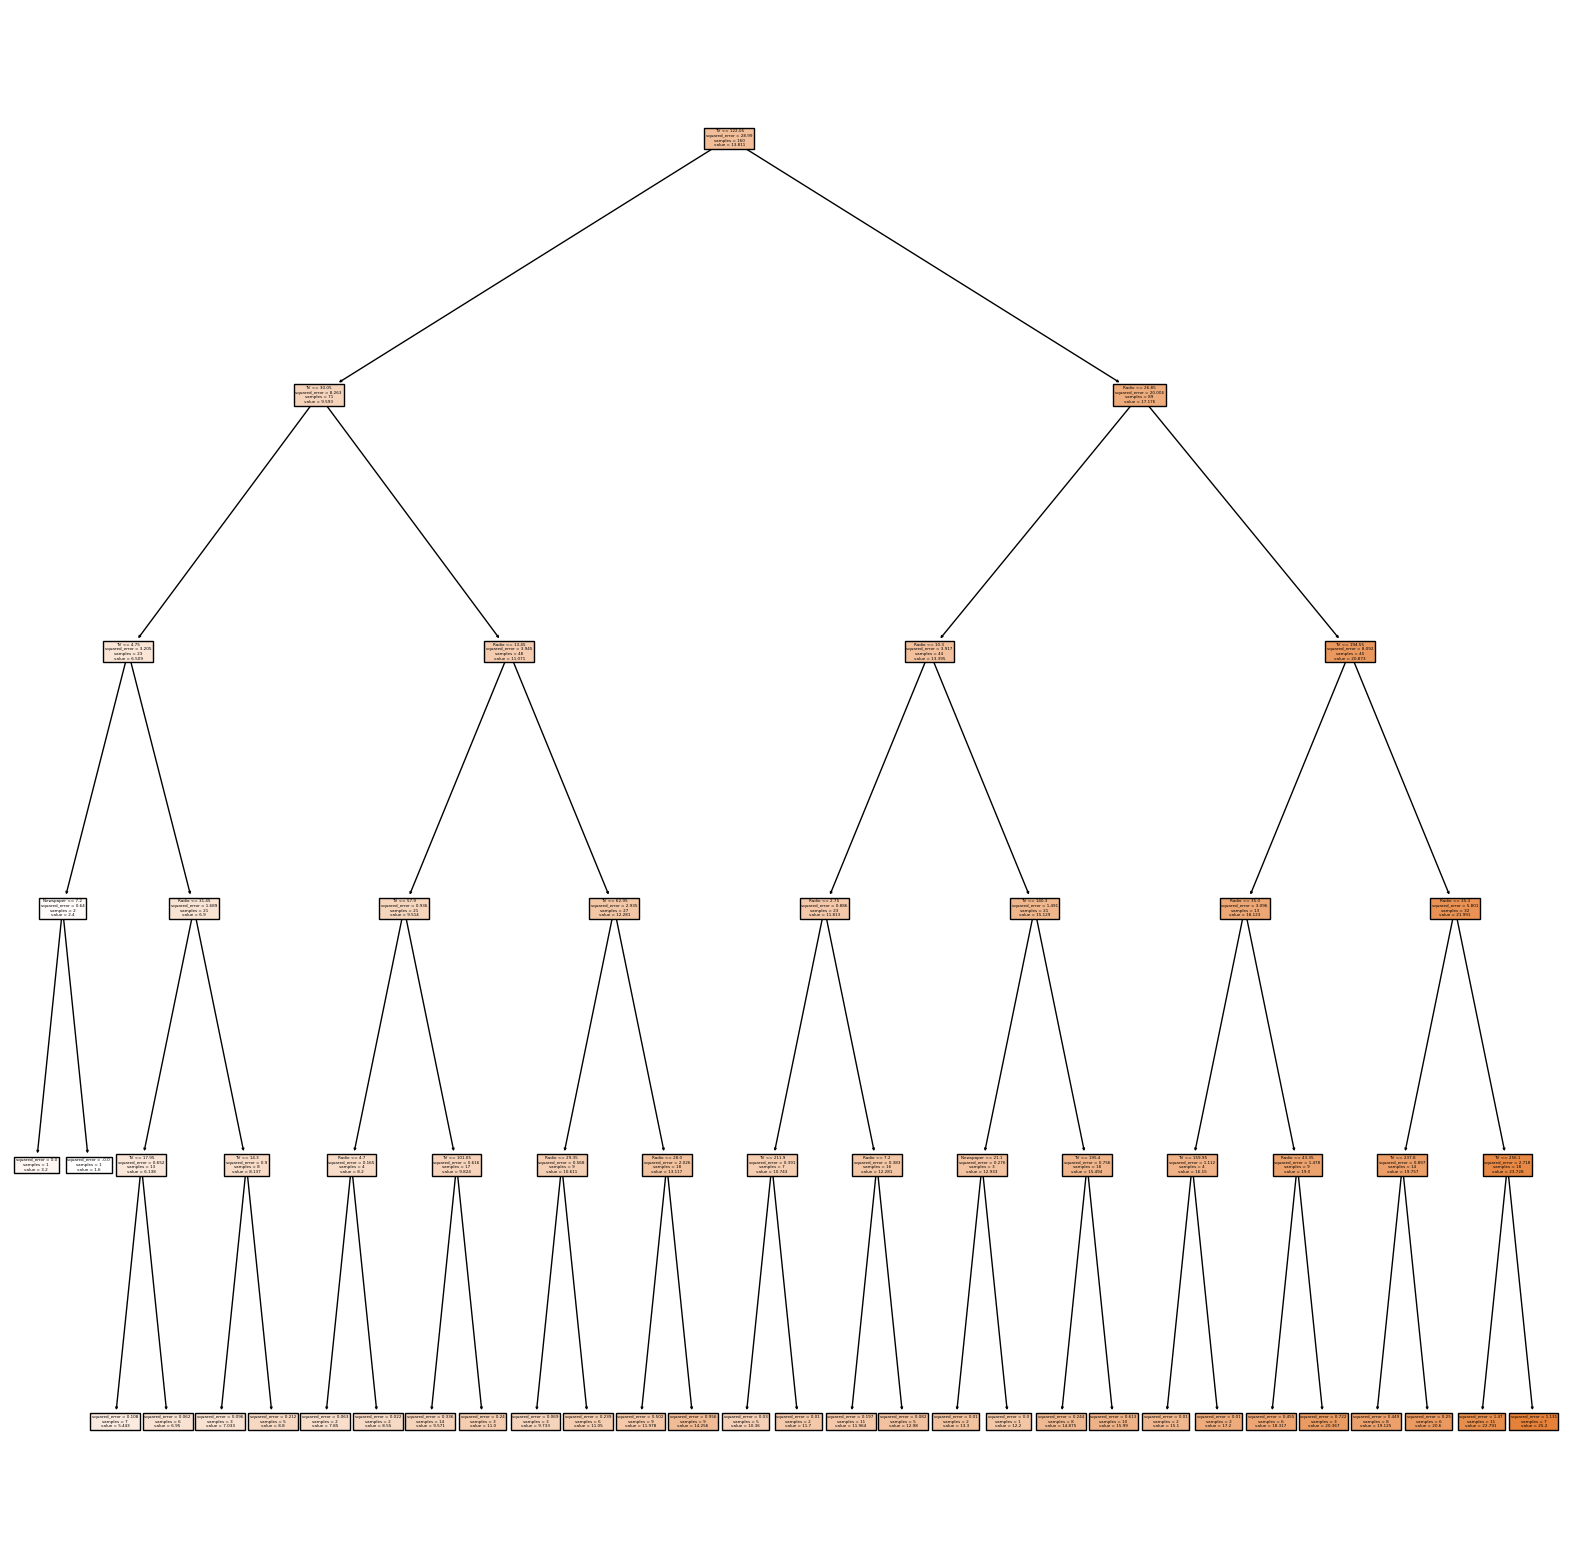

In [24]:
plt.figure(figsize=(20, 20))
plot_tree(
    dt_reg_pruned,
    feature_names=df.drop(columns=["Sales"]).columns,
    filled=True,
)
plt.savefig("dt_reg_pruned_tree.svg", format="svg", dpi=500)
plt.show()

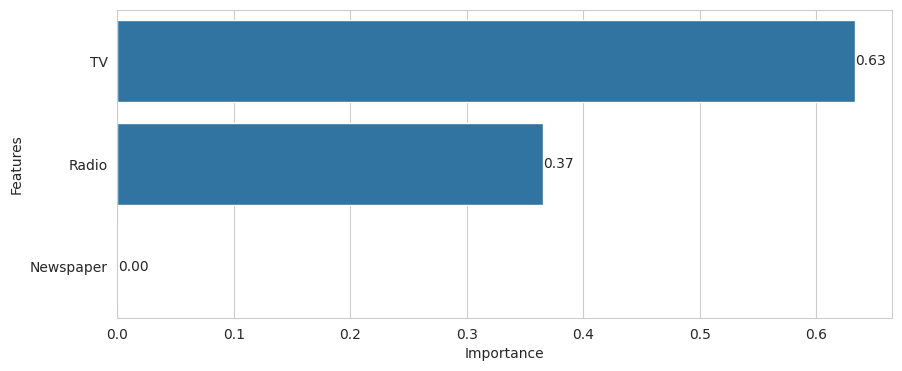

In [25]:
dt_reg_pruned_feat_importances = pd.Series(
    dt_reg_pruned.feature_importances_, index=["TV", "Radio", "Newspaper"]
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=dt_reg_pruned_feat_importances,
        y=dt_reg_pruned_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [26]:
train_preds_dt_reg_pruned = dt_reg_pruned.predict(X_train_ad)
valid_preds_dt_reg_pruned = dt_reg_pruned.predict(X_valid_ad)

print(
    "MSE სატრენინგო მონაცემებზე: "
    f"{mean_squared_error(y_train_ad, train_preds_dt_reg_pruned):.2f}"
)
print(
    "MSE ვალიდაციის მონაცემებზე: "
    f"{mean_squared_error(y_valid_ad, valid_preds_dt_reg_pruned):.2f}"
)

MSE სატრენინგო მონაცემებზე: 0.42
MSE ვალიდაციის მონაცემებზე: 1.21


In [27]:
print(f"ხის სიღრმე: {dt_reg_pruned.get_depth()}")
print(f"ფოთლების, leaf node-ების რაოდენობა: {dt_reg_pruned.get_n_leaves()}")

ხის სიღრმე: 5
ფოთლების, leaf node-ების რაოდენობა: 30


### Random Forest 🌳🌳🌳🌳🌳🌳🌳🌳

შესაძლებელია ბევრი "სუსტი" გადაწყვეტილების ხით "ძლიერი" ტყე შევქმნათ, მივიღოთ თითოეული ხისგან პროგნოზები და ხმათა უმრავლესობით ავარჩიოთ თუ რომელი პროგნოზი უნდა გამოვიყენოთ. ეს აზრი დევს ზუსტად Random Forest-ის უკან.

![Random Forest](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*2LrBH84t4ZH6Jl3K.png)

Random Forest შემთხვევითად არჩევს ჩანაწერებს სასწავლო მონაცემებიდან (ამ პროცესს ვუწოდებთ bagging-ს) ჩანაცვლებით და ეს შემთხვევითად ამორჩეული მონაცემთა ნაკრებები გამოიყენება ცალკეული Decision Tree-ების დასატრენინგებლად. კლასიფიკაციის დროს ამ ხეებიდან უმრავლესობის მიერ ნაპროგნოზირებულ კლასს ვირჩევთ, ხოლო რეგრესიის დროს პროგნოზების საშუალოს.

#### კლასიფიკაცია

ნაგულისხმევად აქაც Gini ინდექსი გამოიყენება კრიტერიუმად.

In [28]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train_iris, y_train_iris)

RandomForestClassifier(random_state=1)

ნაგულისხმევად 100 ცალი Decision Tree გამოიყენება:

In [29]:
len(rf_clf.estimators_)

100

დატრენინგებული მოდელიდან შეგვიძლია დაგენერირებული ხეები ვიზუალურად გამოვსახოთ. სიმარტივისთვის მხოლოდ პირველი 2 გამოვსახოთ:

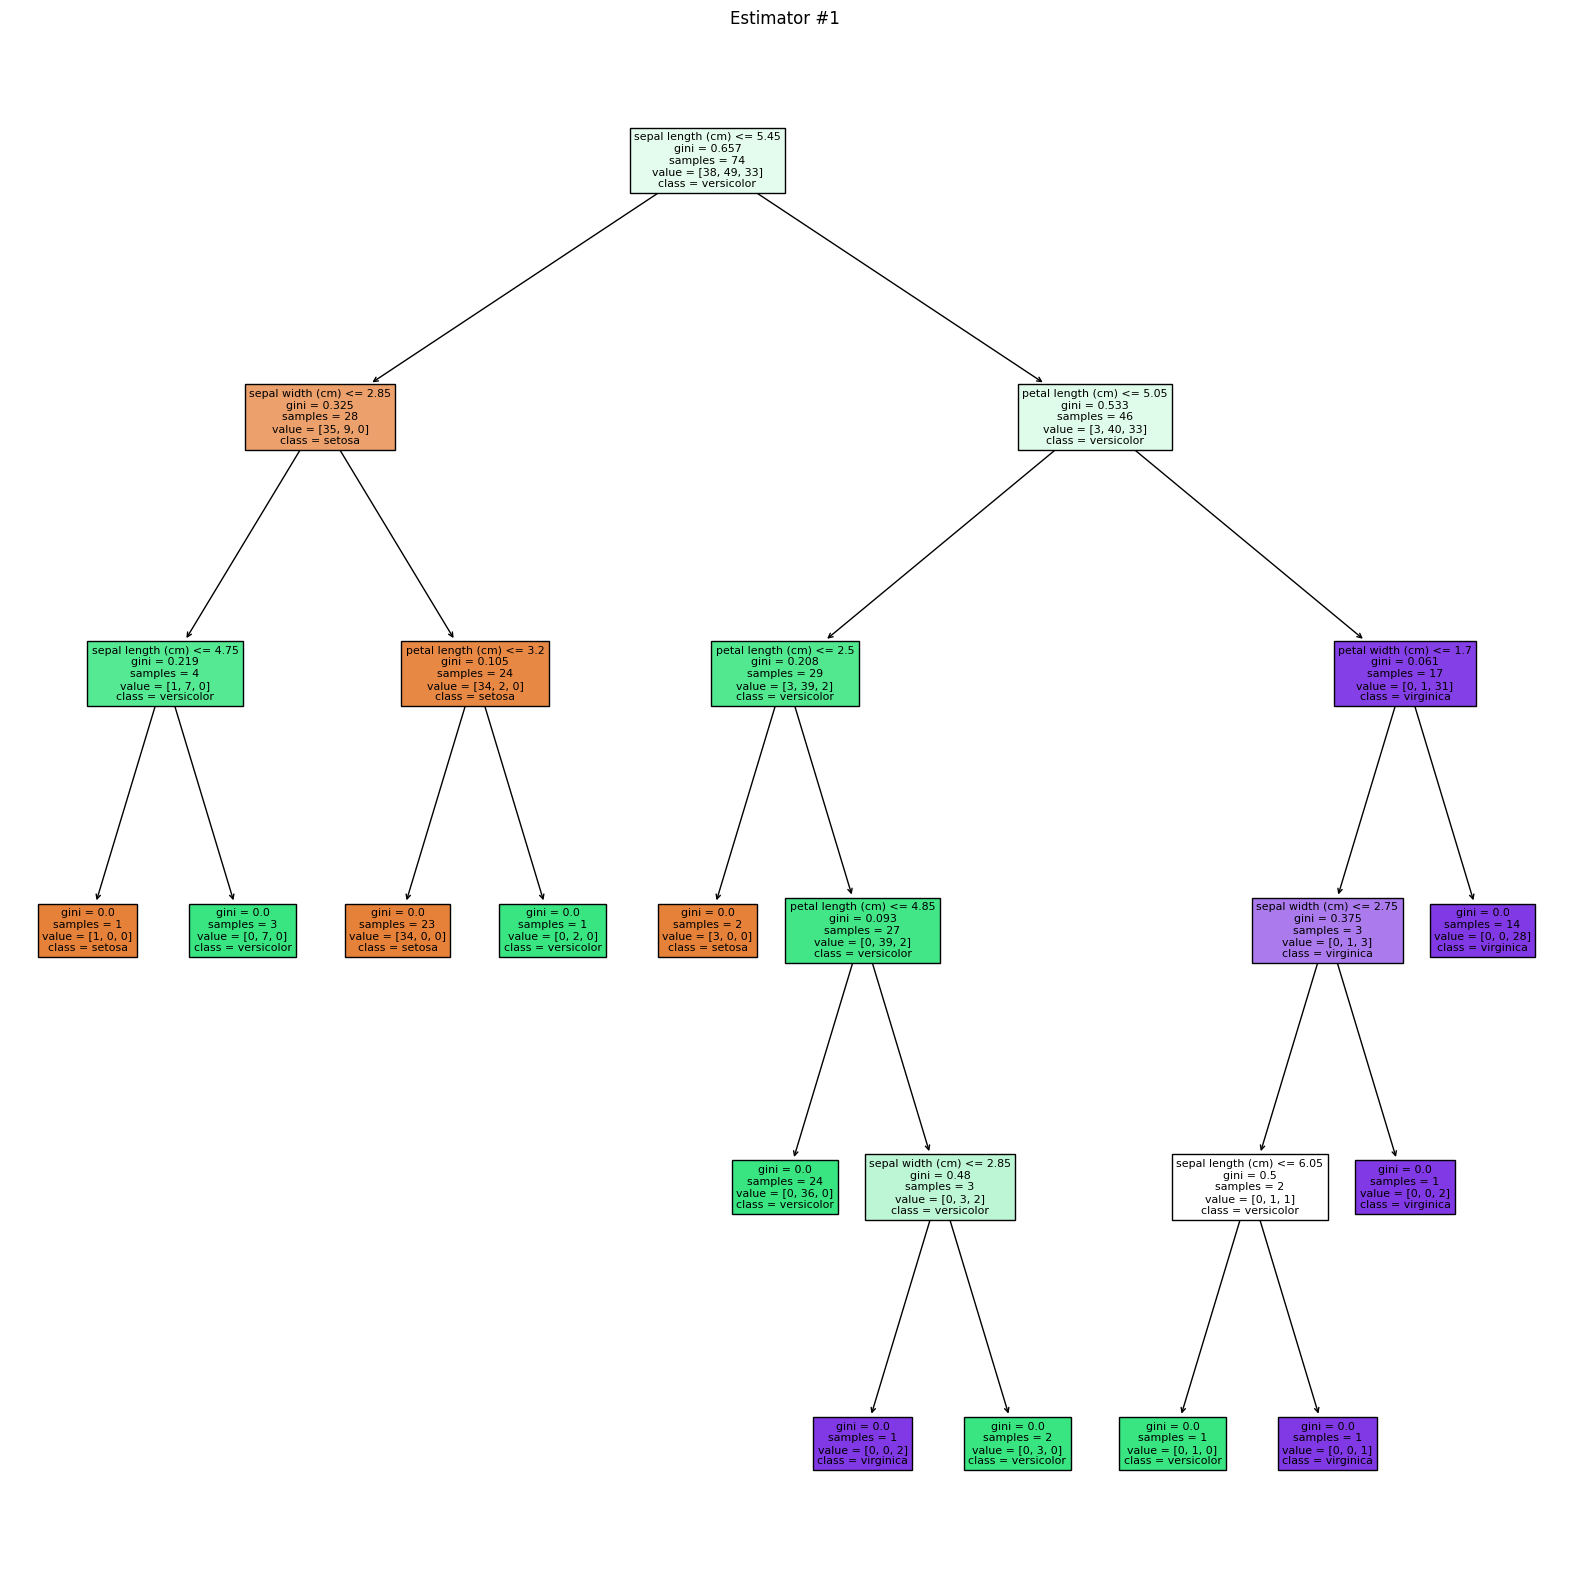

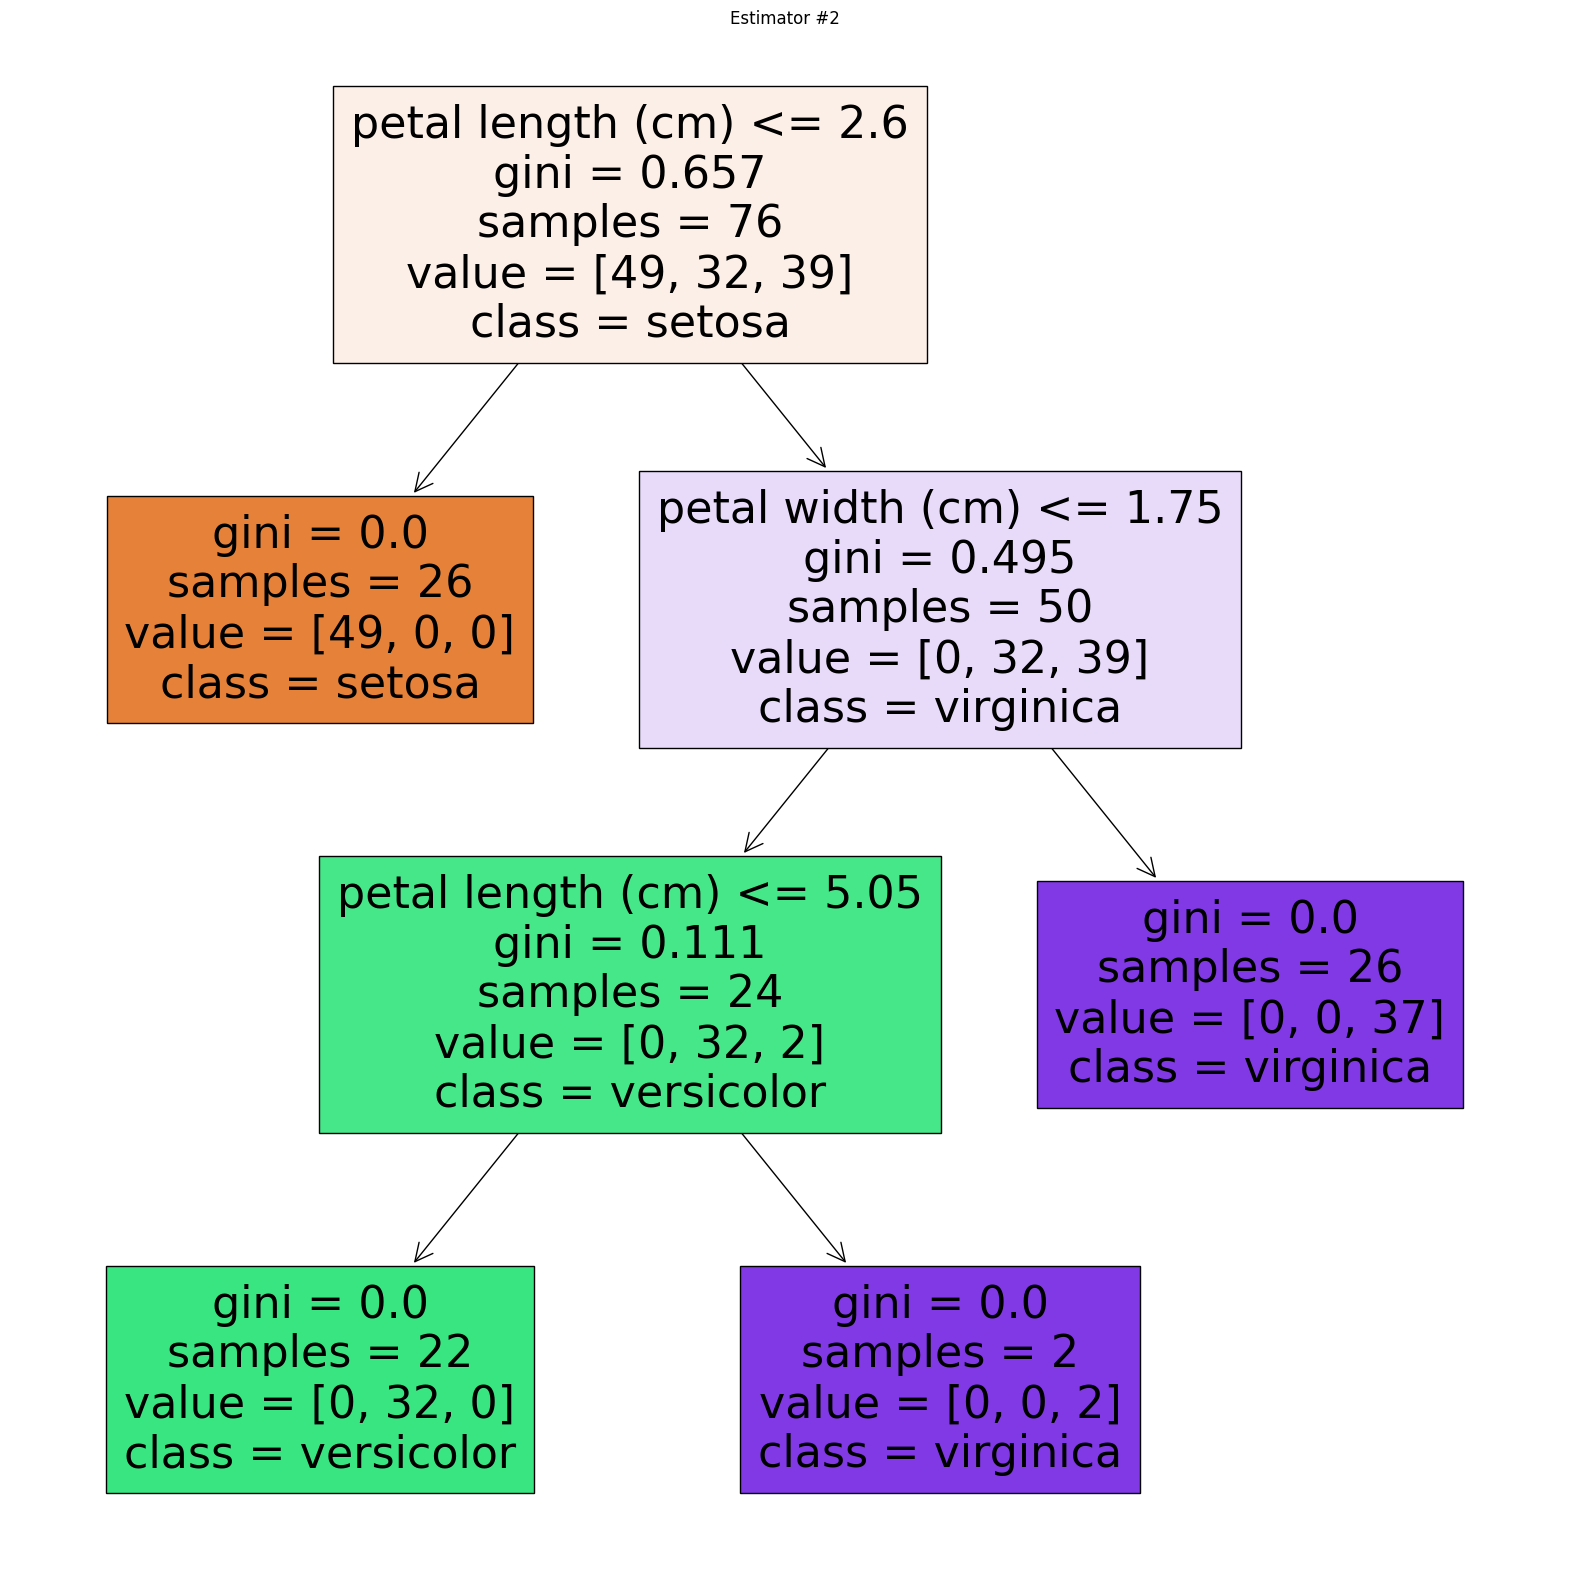

In [30]:
for ind, estimator in enumerate(rf_clf.estimators_[:2], start=1):
    plt.figure(figsize=(20, 20))
    plot_tree(
        estimator,
        feature_names=iris_data.feature_names,
        class_names=iris_data.target_names,
        filled=True,
    )
    plt.title(f"Estimator #{ind}")
    plt.show()

ასევე შესაძლებელია ვნახოთ თითოეული მახასიათებელი რამდენად მნიშვნელოვანი იყო, ანუ მათი importance-ები:

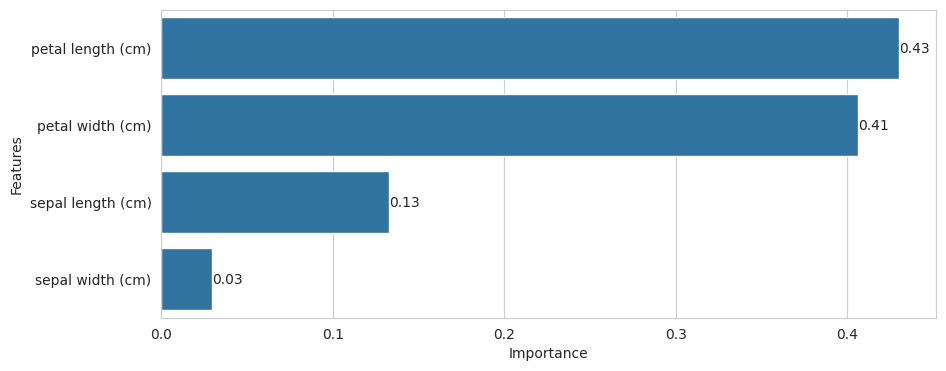

In [31]:
rf_clf_feat_importances = pd.Series(
    rf_clf.feature_importances_, index=iris_data.feature_names
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=rf_clf_feat_importances,
        y=rf_clf_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [32]:
train_preds_rf_clf = rf_clf.predict(X_train_iris)
valid_preds_rf_clf = rf_clf.predict(X_valid_iris)

print(
    "აკურატულობა სატრენინგო მონაცემებზე: "
    f"{accuracy_score(y_train_iris, train_preds_rf_clf) * 100:.2f}%"
)
print(
    "აკურატულობა ვალიდაციის მონაცემებზე: "
    f"{accuracy_score(y_valid_iris, valid_preds_rf_clf) * 100:.2f}%"
)

აკურატულობა სატრენინგო მონაცემებზე: 100.00%
აკურატულობა ვალიდაციის მონაცემებზე: 96.67%


როგორც შედეგებიდან ჩანს, მოდელი "ზედმეტად მოერგო" მონაცემებს, ამიტომაც შეგვიძლია ხელოვნურად შევუზღუდოთ ხის სიღრმე და ხეების რაოდენობა:

In [33]:
rf_clf_pruned = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=10)
rf_clf_pruned.fit(X_train_iris, y_train_iris)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=1)

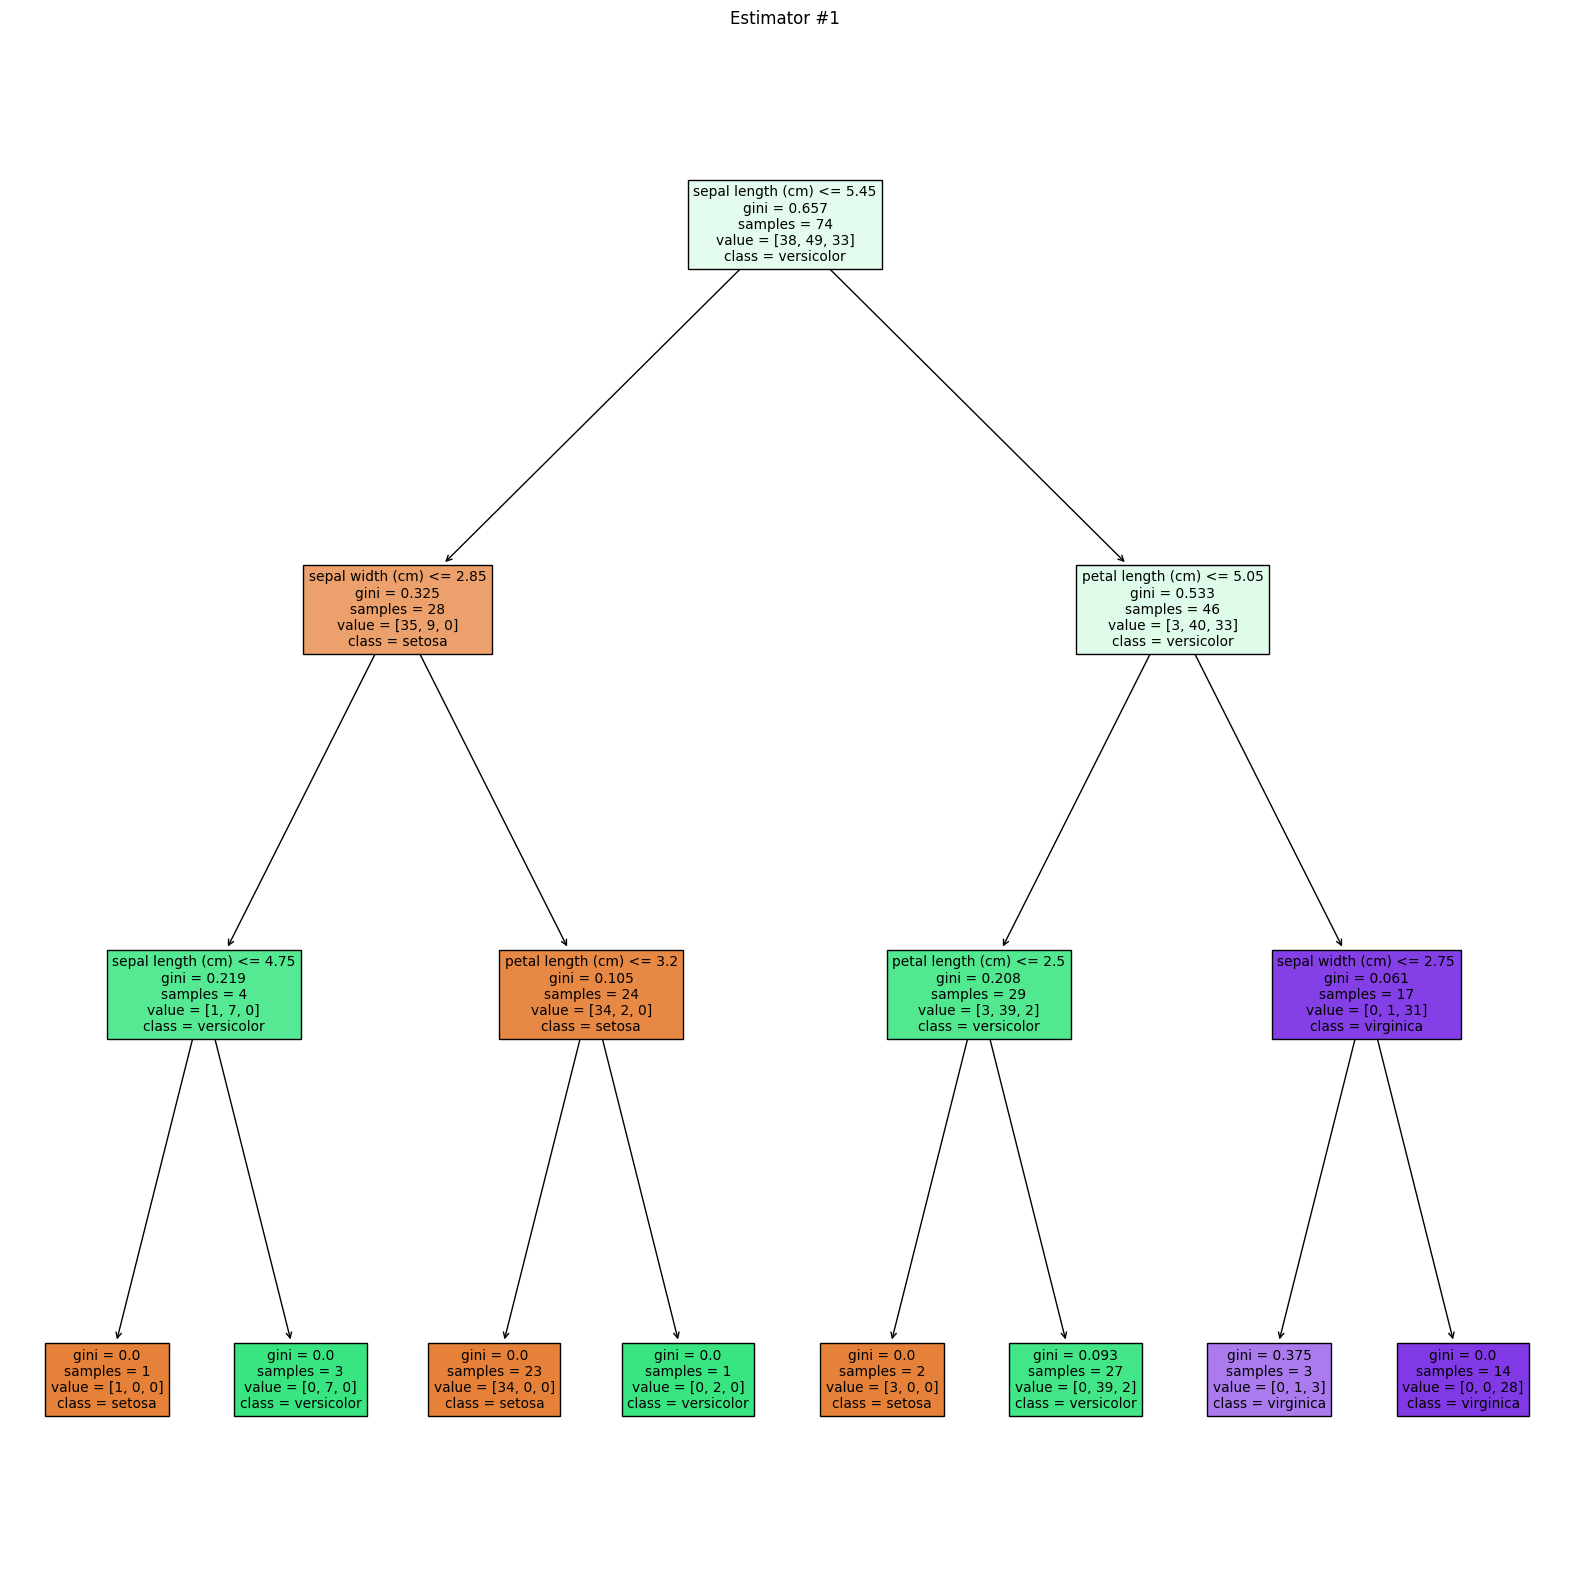

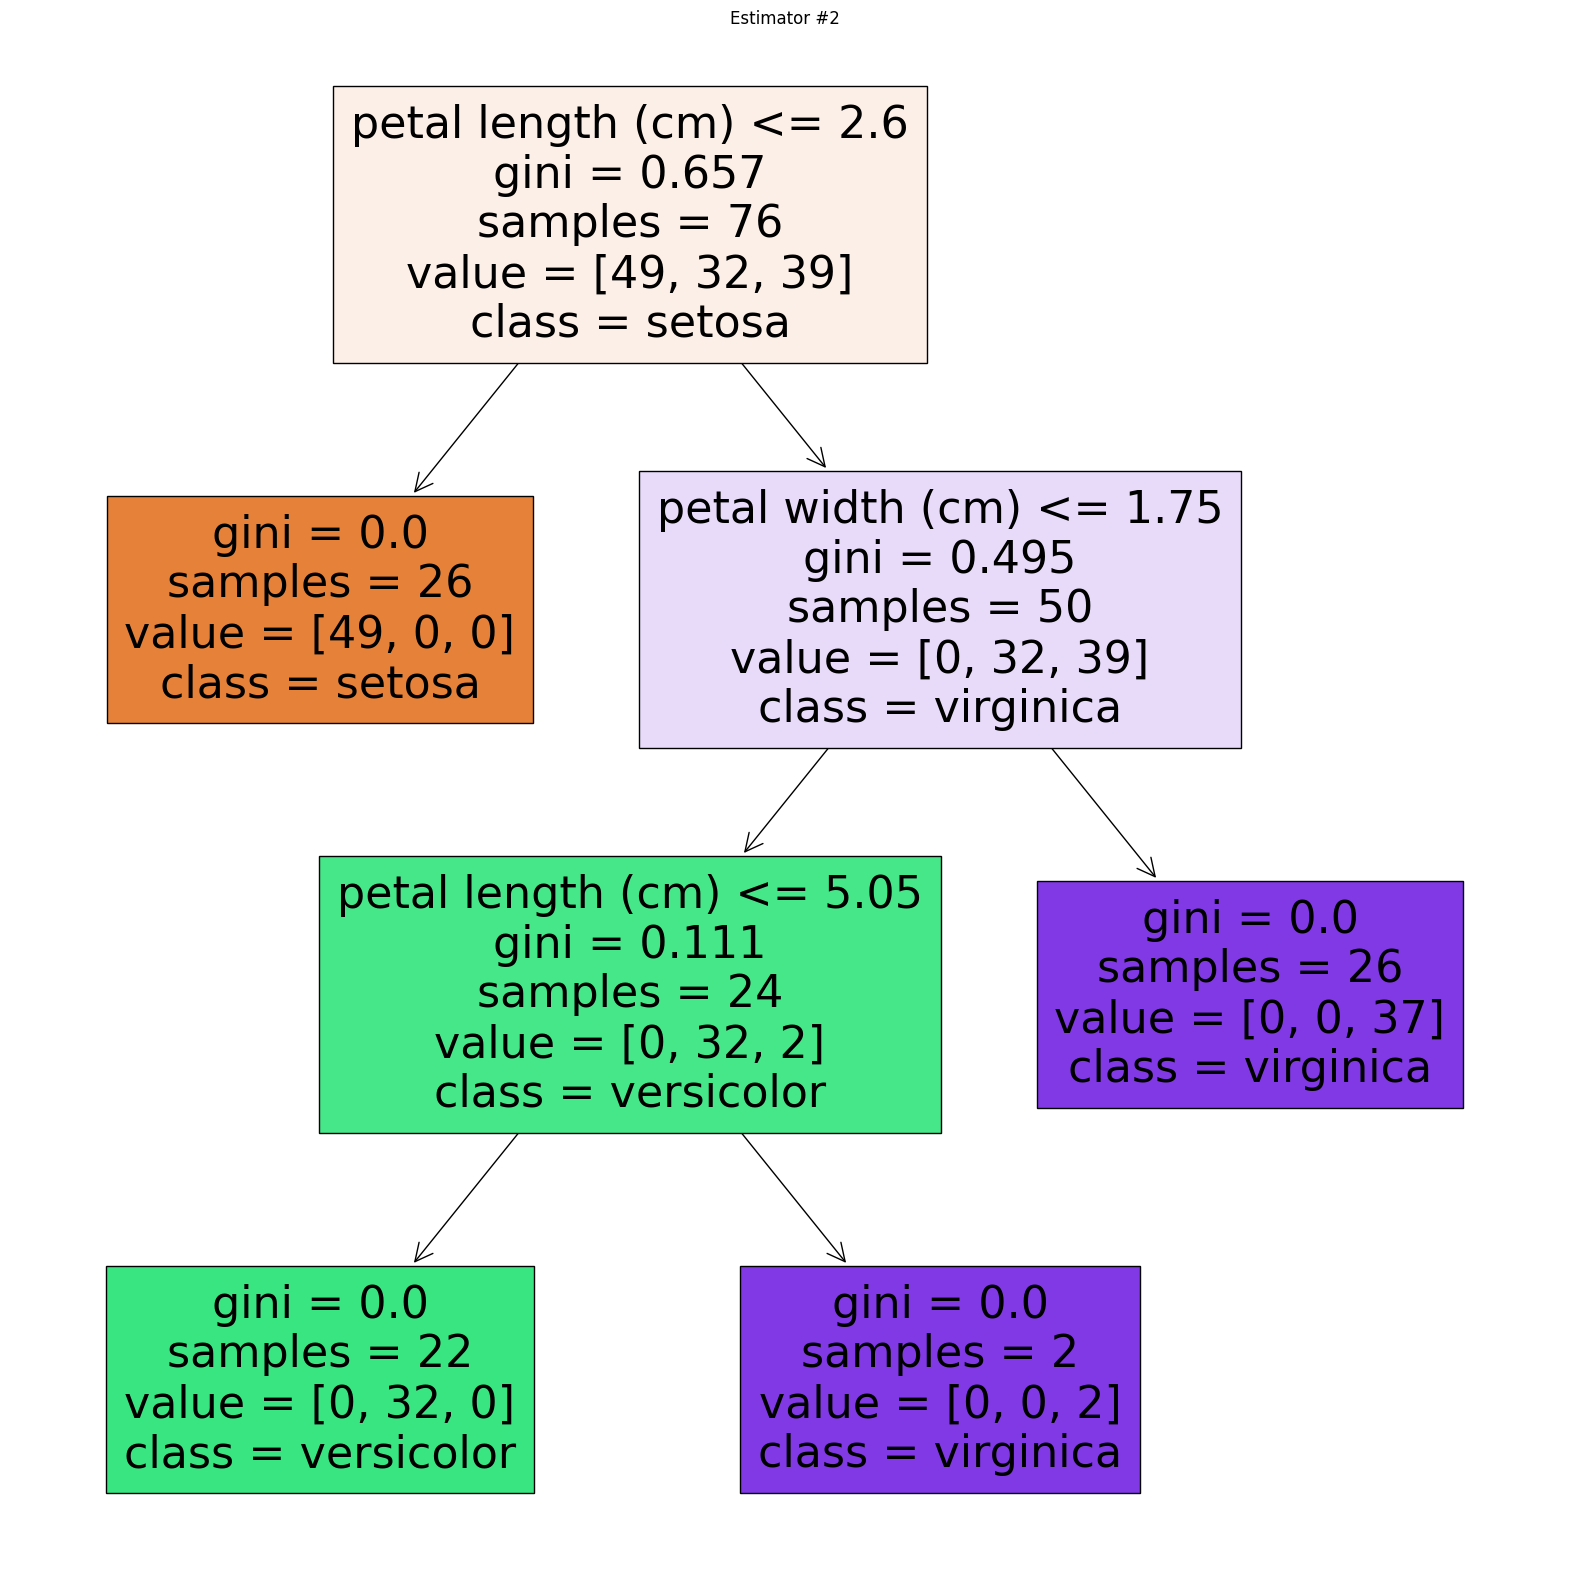

In [34]:
for ind, estimator in enumerate(rf_clf_pruned.estimators_[:2], start=1):
    plt.figure(figsize=(20, 20))
    plot_tree(
        estimator,
        feature_names=iris_data.feature_names,
        class_names=iris_data.target_names,
        filled=True,
    )
    plt.title(f"Estimator #{ind}")
    plt.show()

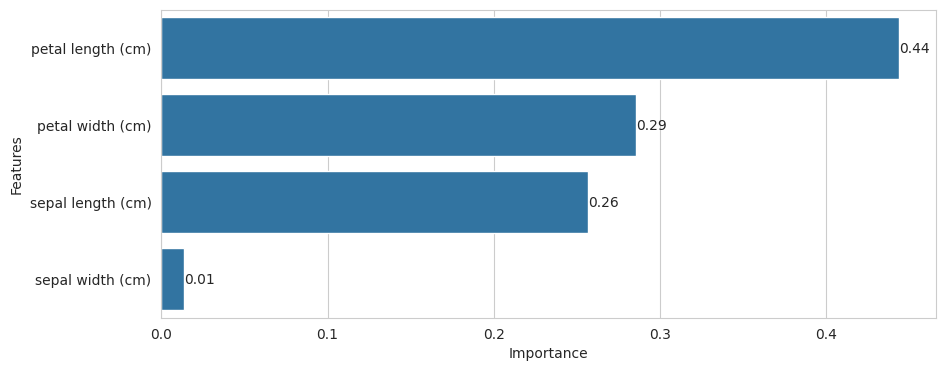

In [35]:
rf_clf_pruned_feat_importances = pd.Series(
    rf_clf_pruned.feature_importances_, index=iris_data.feature_names
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=rf_clf_pruned_feat_importances, y=rf_clf_pruned_feat_importances.index
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [36]:
train_preds_rf_clf_pruned = rf_clf_pruned.predict(X_train_iris)
valid_preds_rf_clf_pruned = rf_clf_pruned.predict(X_valid_iris)

print(
    "აკურატულობა სატრენინგო მონაცემებზე: "
    f"{accuracy_score(y_train_iris, train_preds_rf_clf_pruned) * 100:.2f}%"
)
print(
    "აკურატულობა ვალიდაციის მონაცემებზე: "
    f"{accuracy_score(y_valid_iris, valid_preds_rf_clf_pruned) * 100:.2f}%"
)

აკურატულობა სატრენინგო მონაცემებზე: 98.33%
აკურატულობა ვალიდაციის მონაცემებზე: 96.67%


#### რეგრესია

ნაგულისხმევად MSE გამოიყენება კრიტერიუმად რეგრესიისთვის.

In [37]:
rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(X_train_ad, y_train_ad)

RandomForestRegressor(random_state=1)

რეგრესიისთვისაც შესაძლებელია დაგენერირებული ხის ვიზუალურად გამოსახვა:

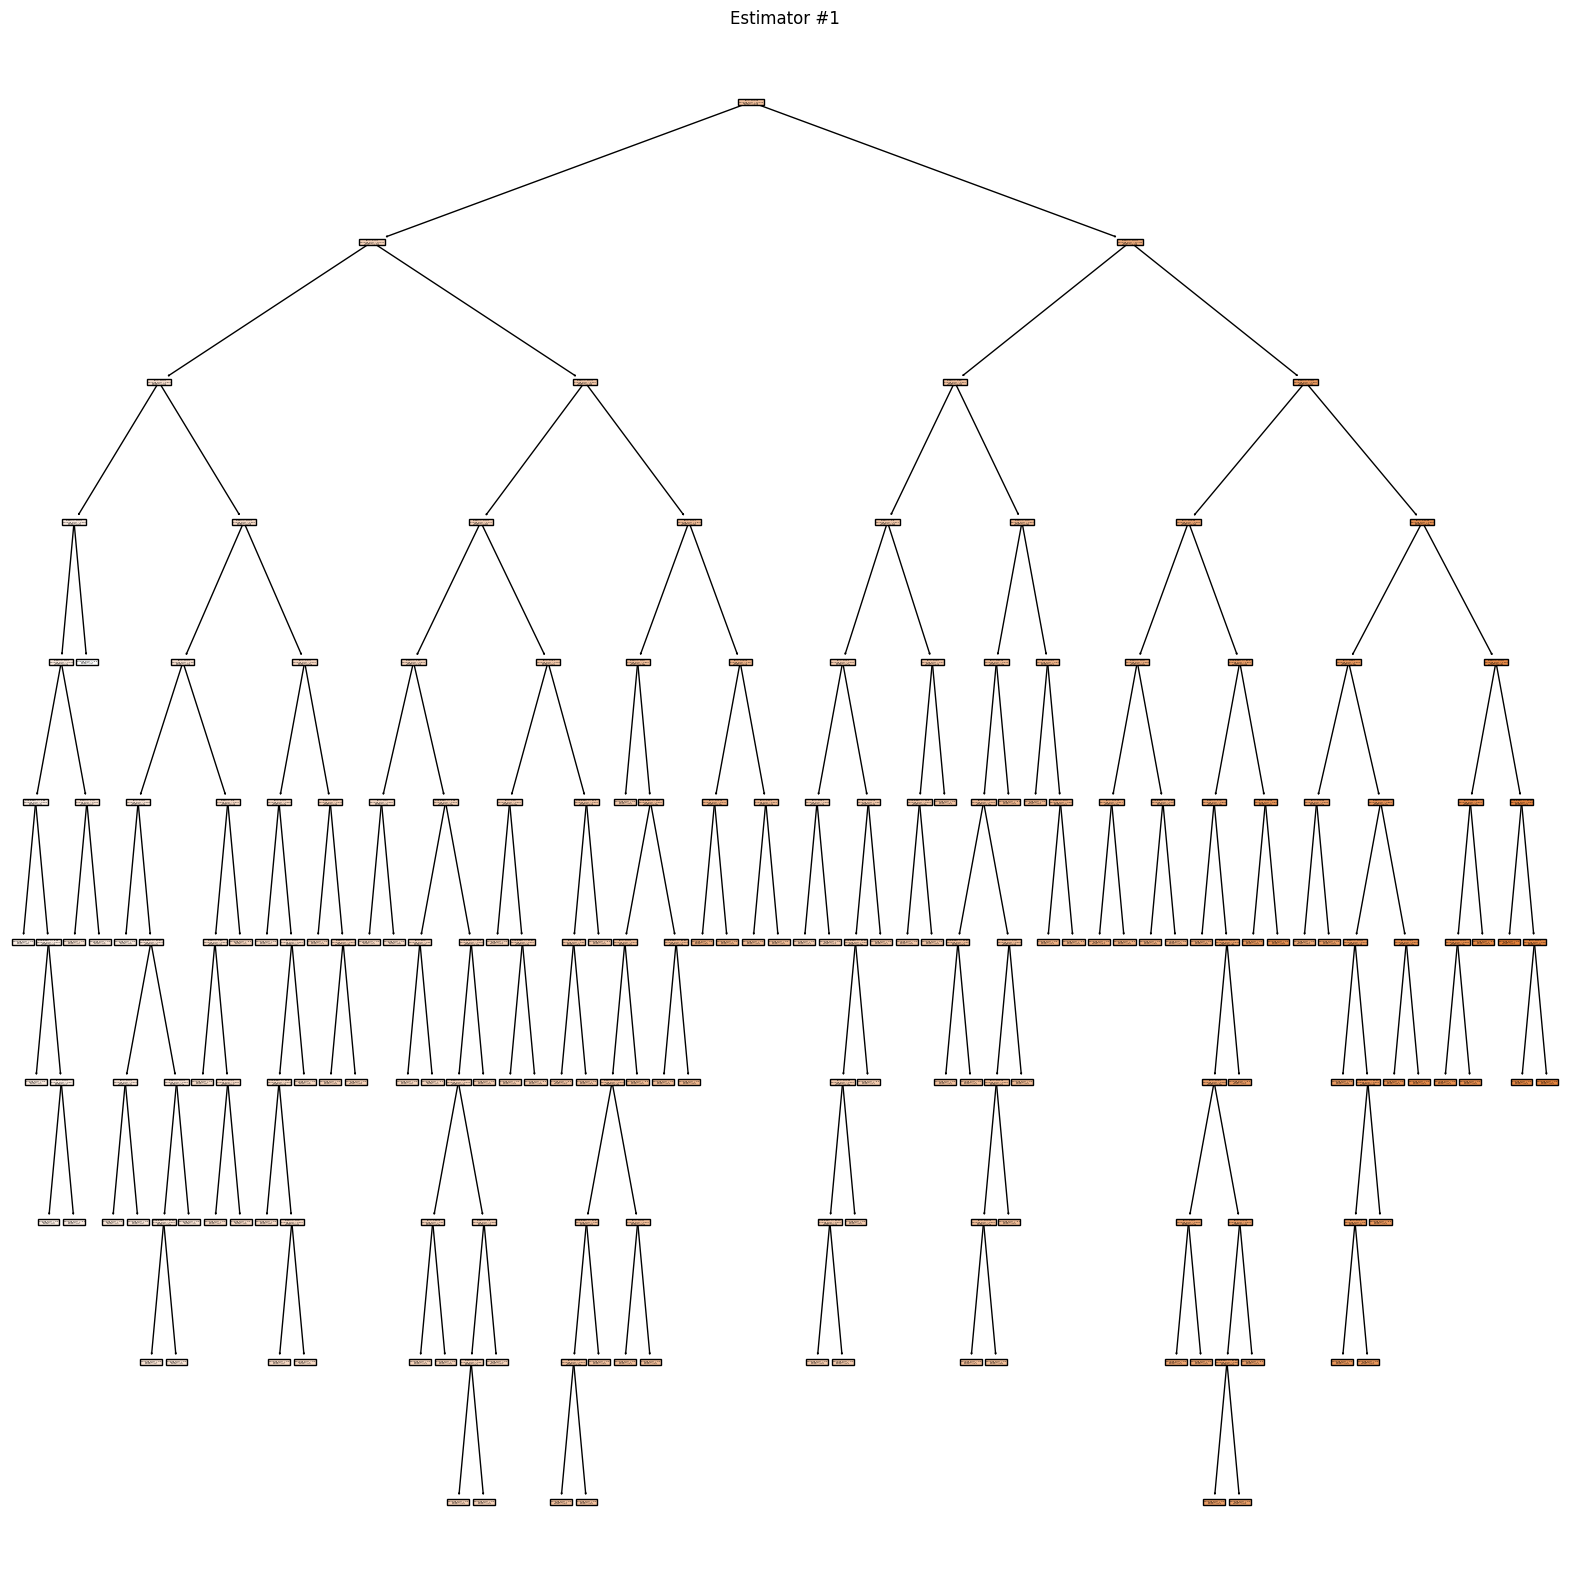

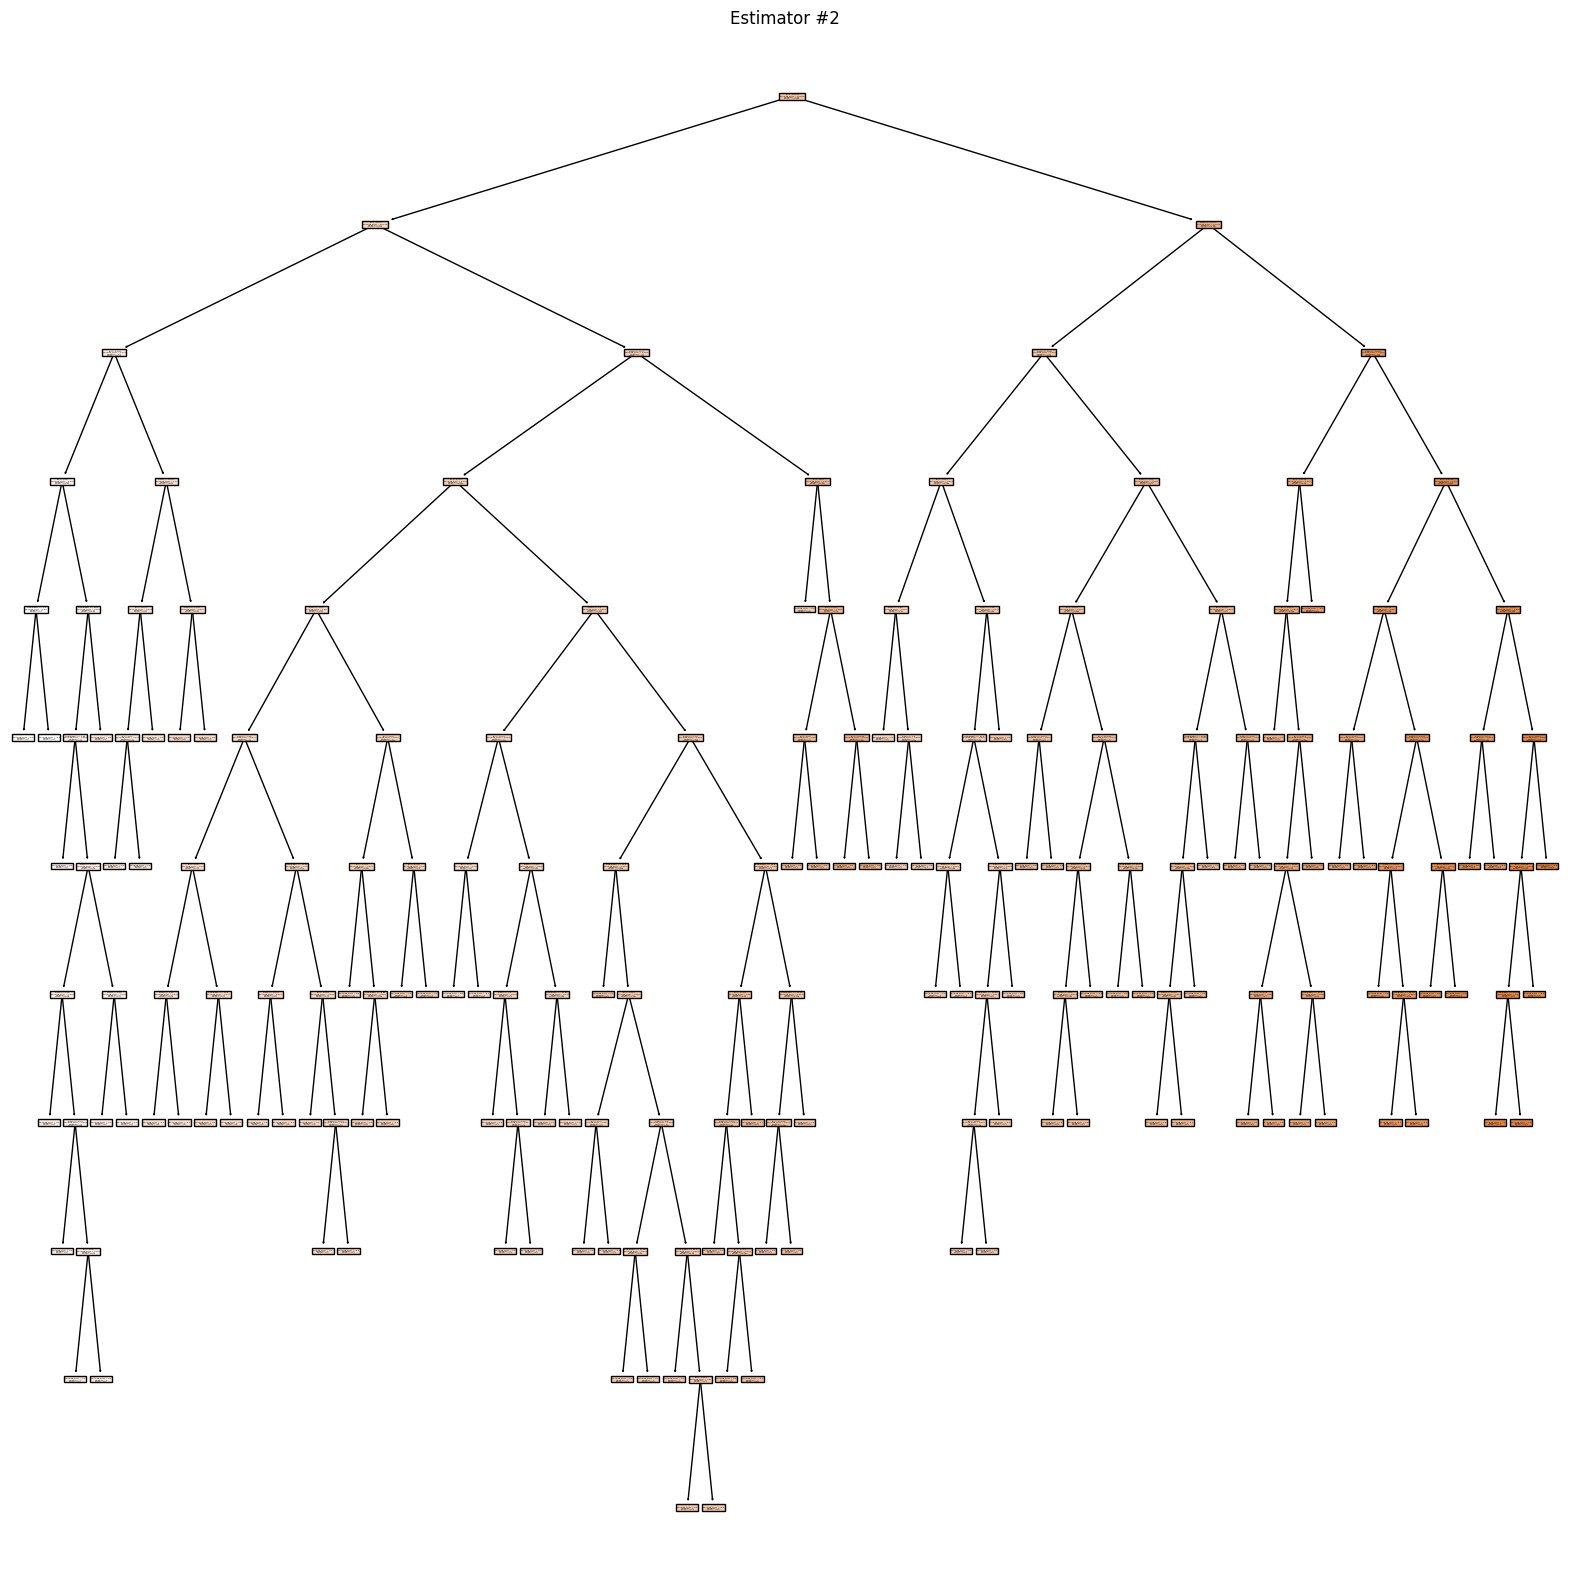

In [38]:
for ind, estimator in enumerate(rf_reg.estimators_[:2], start=1):
    plt.figure(figsize=(20, 20))
    plot_tree(estimator, feature_names=["TV", "Radio", "Newspaper"], filled=True)
    plt.title(f"Estimator #{ind}")
    # დიდი ალბათობით უზარმაზარ ხეს მივიღებთ, ამიტომ სასურველია ფოტოდ შევინახოთ, რომ მარტივად შევძლოთ დაზუმება
    plt.savefig(f"rf_reg_estimator_{ind}.svg", format="svg", dpi=500)
    plt.show()

ასევე მახასიათებლების importance-ები:

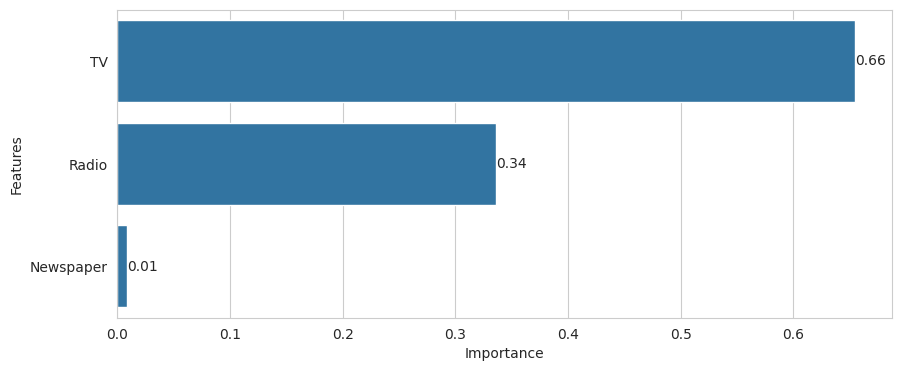

In [39]:
rf_reg_feat_importances = pd.Series(
    rf_reg.feature_importances_, index=["TV", "Radio", "Newspaper"]
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=rf_reg_feat_importances,
        y=rf_reg_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [40]:
train_preds_rf_reg = rf_reg.predict(X_train_ad)
valid_preds_rf_reg = rf_reg.predict(X_valid_ad)

print(
    "MSE სატრენინგო მონაცემებზე: "
    f"{mean_squared_error(y_train_ad, train_preds_rf_reg):.2f}"
)
print(
    "MSE ვალიდაციის მონაცემებზე: "
    f"{mean_squared_error(y_valid_ad, valid_preds_rf_reg):.2f}"
)

MSE სატრენინგო მონაცემებზე: 0.10
MSE ვალიდაციის მონაცემებზე: 0.47


რეგრესიის შემთხვევაშიც შეგვიძლია ხის სიღმის და ხეების რაოდენობის შეზღუდვა:

In [41]:
rf_reg_pruned = RandomForestRegressor(random_state=1, max_depth=4, n_estimators=10)
rf_reg_pruned.fit(X_train_ad, y_train_ad)

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=1)

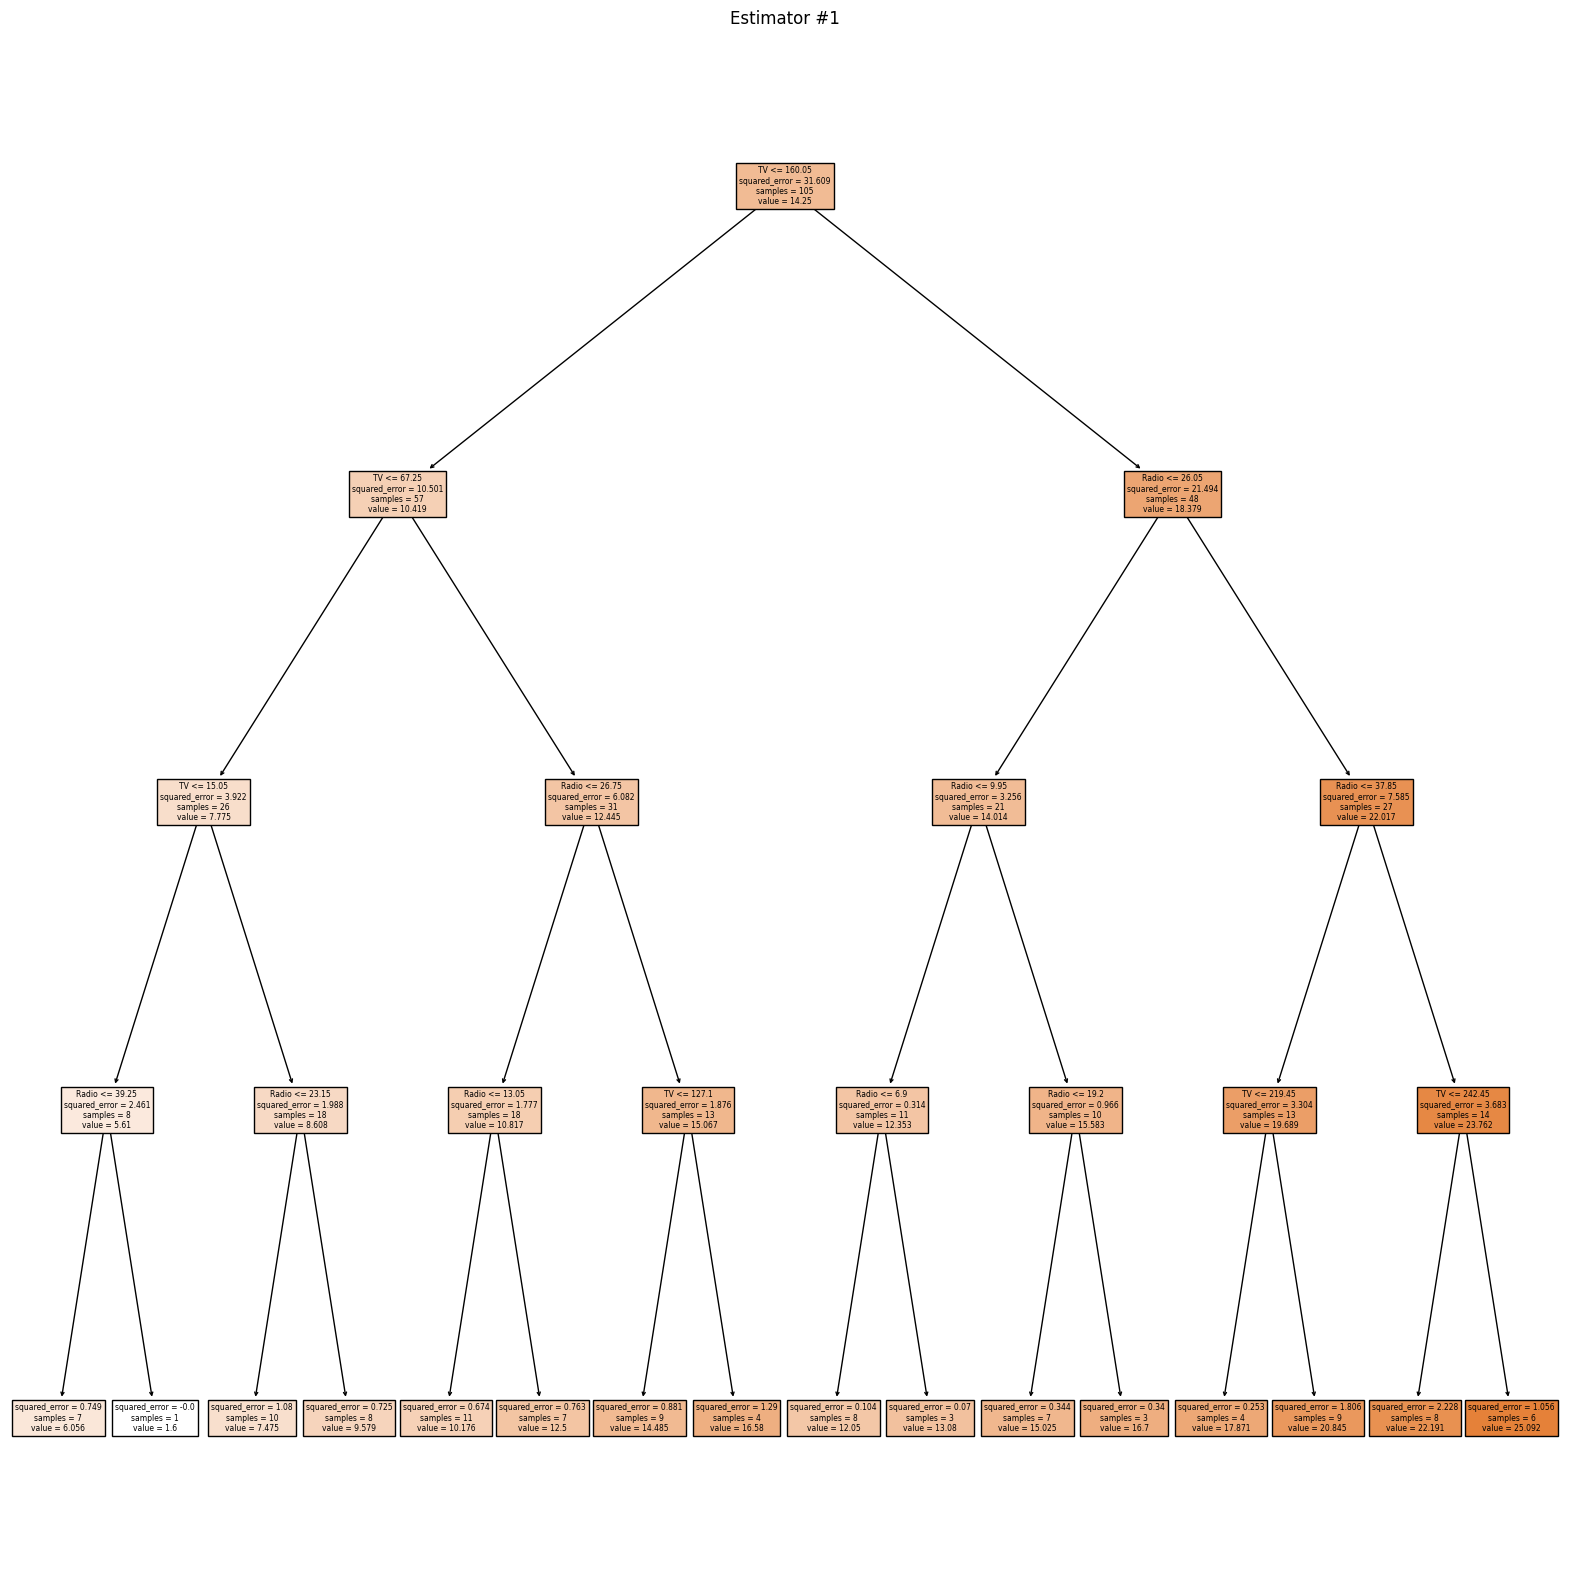

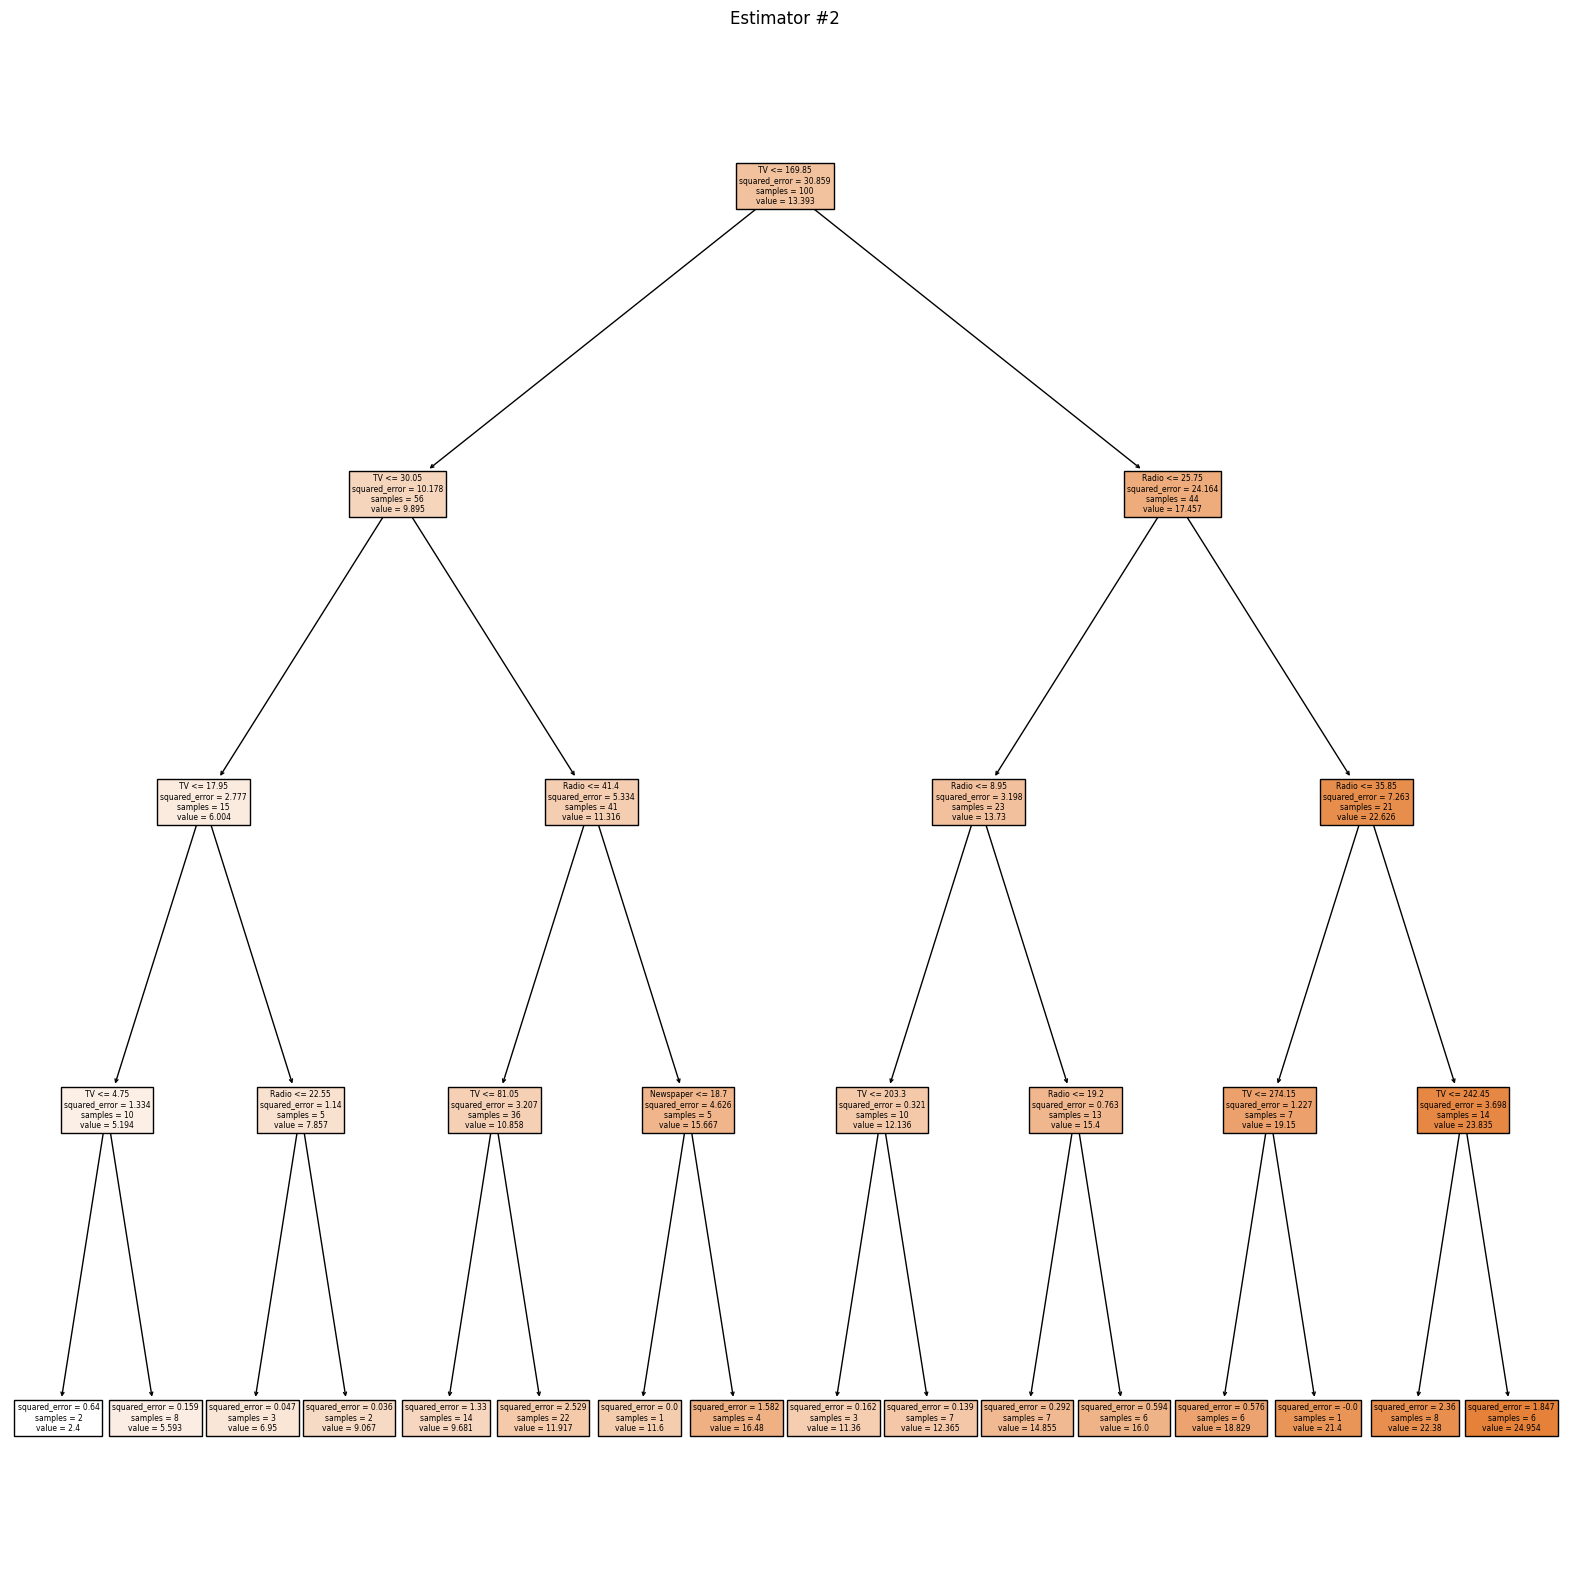

In [42]:
for ind, estimator in enumerate(rf_reg_pruned.estimators_[:2], start=1):
    plt.figure(figsize=(20, 20))
    plot_tree(estimator, feature_names=["TV", "Radio", "Newspaper"], filled=True)
    plt.title(f"Estimator #{ind}")
    # დიდი ალბათობით უზარმაზარ ხეს მივიღებთ, ამიტომ სასურველია ფოტოდ შევინახოთ, რომ მარტივად შევძლოთ დაზუმება
    plt.savefig(f"rf_reg_pruned_estimator_{ind}.svg", format="svg", dpi=500)
    plt.show()

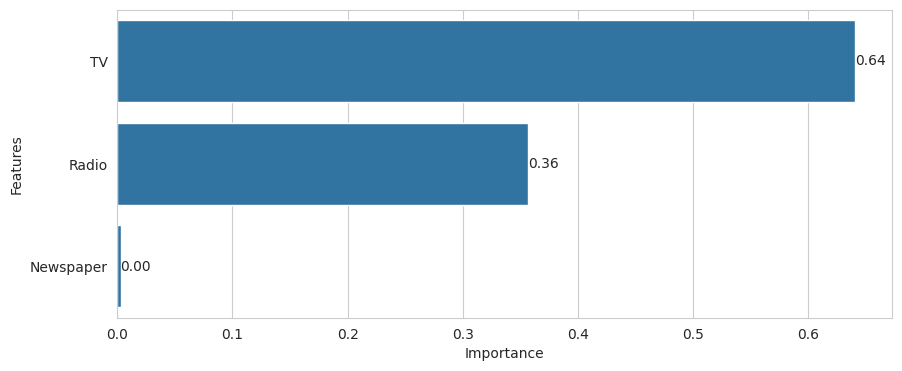

In [43]:
rf_reg_pruned_feat_importances = pd.Series(
    rf_reg_pruned.feature_importances_, index=["TV", "Radio", "Newspaper"]
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=rf_reg_pruned_feat_importances,
        y=rf_reg_pruned_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [44]:
train_preds_rf_reg_pruned = rf_reg_pruned.predict(X_train_ad)
valid_preds_rf_reg_pruned = rf_reg_pruned.predict(X_valid_ad)

print(
    "MSE სატრენინგო მონაცემებზე: "
    f"{mean_squared_error(y_train_ad, train_preds_rf_reg_pruned):.2f}"
)
print(
    "MSE ვალიდაციის მონაცემებზე: "
    f"{mean_squared_error(y_valid_ad, valid_preds_rf_reg_pruned):.2f}"
)

MSE სატრენინგო მონაცემებზე: 0.49
MSE ვალიდაციის მონაცემებზე: 0.84
